<a href="https://colab.research.google.com/github/AlphonsaJo/Lab_1_MachineLearning/blob/main/Warchar_Lab_5_Teams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

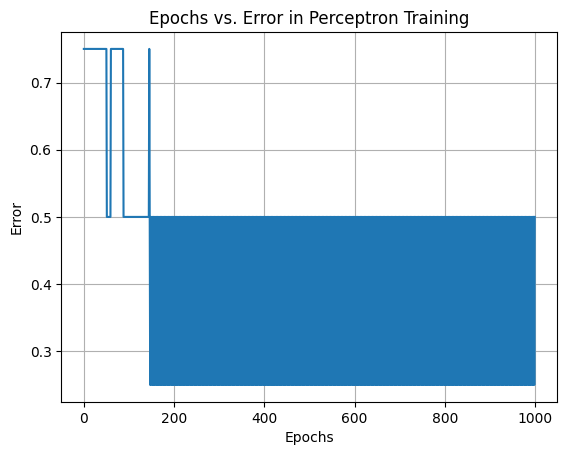

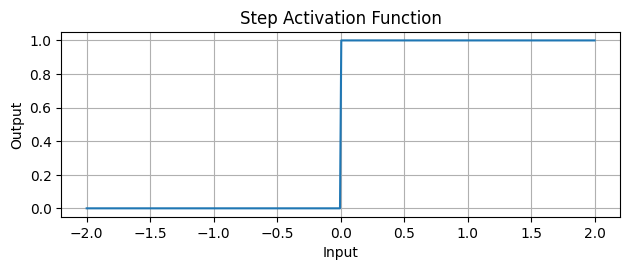

In [ ]:
#Ashik F
#BL.EN.U4CSE21032
#Contribution: Code + Comment Lines

#Question 1
'''A1. Develop the above perceptron in your own code (don’t use the perceptron model available from
package). Use the initial weights as provided below.
W0 = 10, W1 = 0.2, w2 = -0.75, learning rate (α) = 0.05
Use Step activation function to learn the weights of the network to implement above provided AND
gate logic.
Identify the number of epochs needed for the weights to converge in the learning process. Make a
plot of the epochs against the error values calculated (after each epoch, calculate the sum-square error against all training samples). '''


import matplotlib.pyplot as plt
import numpy as np

# Initialize weights and learning rate
W = [10, 0.2, -0.75]
learning_rate = 0.05

# Define AND gate inputs and target outputs
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_target = [0, 0, 0, 1]

# Define step activation function
def step_activation(x):
    return 1 if x >= 0 else 0 # provides a binary output based on a threshold

# Initialize variables for plotting
epochs = []
errors = []

# Training loop
max_epochs = 1000
convergence_error = 0.002
epoch = 0

while epoch < max_epochs:
    error_sum = 0

    for i in range(len(X)):
        # Calculate the predicted output
        dot_product = sum(W[j] * X[i][j] for j in range(len(X[i]))) + W[0]  # W0 is the bias term
        y_pred = step_activation(dot_product)

        # Update weights
        delta = learning_rate * (y_target[i] - y_pred)
        W[0] += delta  # Update the bias term
        for j in range(1, len(W)):
            W[j] += delta * X[i][j-1]

        # Calculate error for this sample
        error_sum += (y_target[i] - y_pred) ** 2

    # Calculate mean squared error for the epoch
    mean_squared_error = error_sum / len(X)

    # Append epoch and error values for plotting
    epochs.append(epoch)
    errors.append(mean_squared_error)

    # Check for convergence
    if mean_squared_error <= convergence_error:
        print(f"Converged after {epoch} epochs")
        break

    epoch += 1

# Plot epochs vs. errors
plt.plot(epochs, errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Epochs vs. Error in Perceptron Training")
plt.grid(True)
plt.show()

# Plot the step activation function
x_values = np.linspace(-2, 2, 400)
y_values = [step_activation(x) for x in x_values]

plt.subplot(2, 1, 2)
plt.plot(x_values, y_values)
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Step Activation Function")
plt.grid(True)

plt.tight_layout() # This is to provide proper spacing betweent he two plots
plt.show()


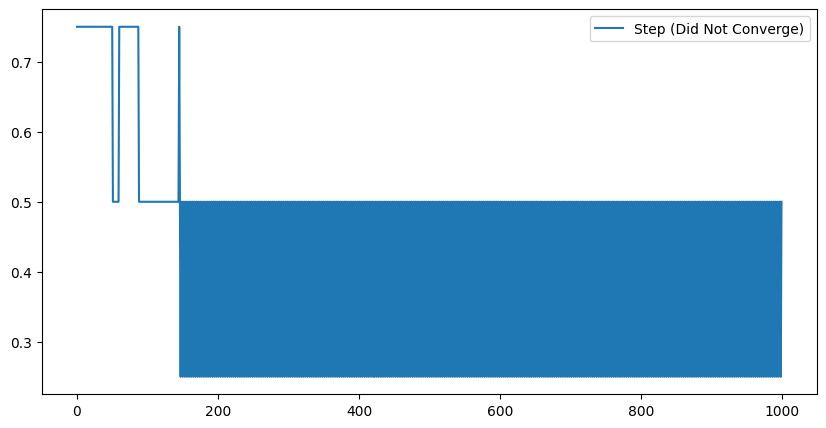

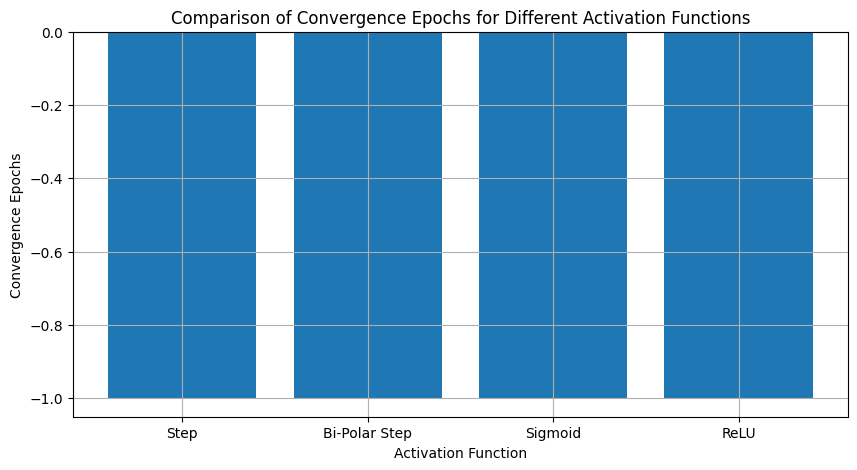

In [ ]:
#Ashik F
#BL.EN.U4CSE21032
#Contribution: Code + Comment Lines

#Question 2
''' Repeat the above A1 experiment with following activation functions. Compare the iterations
taken to converge against each of the activation functions. Keep the learning rate same as A1.
• Bi-Polar Step function
• Sigmoid function
• ReLU function '''

import matplotlib.pyplot as plt
import numpy as np

# Initialize weights and learning rate
W = [10, 0.2, -0.75]
learning_rate = 0.05

# Define AND gate inputs and target outputs
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_target = [0, 0, 0, 1]

# Define activation functions
def step_activation(x):
    return 1 if x >= 0 else 0

def bipolar_step_activation(x):
    return 1 if x >= 0 else -1

def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

def relu_activation(x):
    return max(0, x)

# Initialize variables for plotting
activation_functions = [step_activation, bipolar_step_activation, sigmoid_activation, relu_activation]
activation_function_names = ["Step", "Bi-Polar Step", "Sigmoid", "ReLU"]
convergence_epochs = []

# Initialize max_epochs
max_epochs = 1000
convergence_error = 0.002  # Updated convergence error threshold

# Training loop for each activation function
for activation_function, activation_name in zip(activation_functions, activation_function_names):
    W = [10, 0.2, -0.75]  # Reset weights for each activation function
    epochs = []
    errors = []
    epoch = 0
    converged = False  # Track if convergence occurred

    while epoch < max_epochs:
        error_sum = 0

        for i in range(len(X)):
            # Calculate the predicted output using the current activation function
            dot_product = sum(W[j] * X[i][j] for j in range(len(X[i]))) + W[0]  # W0 is the bias term
            y_pred = activation_function(dot_product)

            # Update weights
            delta = learning_rate * (y_target[i] - y_pred)
            W[0] += delta  # Update the bias term
            for j in range(1, len(W)):
                W[j] += delta * X[i][j-1]

            # Calculate error for this sample
            error_sum += (y_target[i] - y_pred) ** 2

        # Calculate mean squared error for the epoch
        mean_squared_error = error_sum / len(X)

        # Append epoch and error values for plotting
        epochs.append(epoch)
        errors.append(mean_squared_error)

        # Check for convergence
        if mean_squared_error <= convergence_error:
            print(f"{activation_name} converged after {epoch} epochs")
            convergence_epochs.append(epoch)
            converged = True
            break

        epoch += 1

    # If convergence didn't occur, append -1 and break if exceeding 1000 iterations
    if not converged:
        convergence_epochs.append(-1)
        if epoch >= max_epochs:
            break

# Plot epochs vs. errors for each activation function
plt.figure(figsize=(10, 5))
for activation_name, epoch in zip(activation_function_names, convergence_epochs):
    label = f"{activation_name} ({epoch} epochs)" if epoch != -1 else f"{activation_name} (Did Not Converge)"
    plt.plot(epochs, errors, label=label)

# Show the legend for the activation function plots
plt.legend()

# Plot convergence epochs for comparison
plt.figure(figsize=(10, 5))
plt.bar(activation_function_names, convergence_epochs)
plt.xlabel("Activation Function")
plt.ylabel("Convergence Epochs")
plt.title("Comparison of Convergence Epochs for Different Activation Functions")
plt.grid(True)
plt.show()

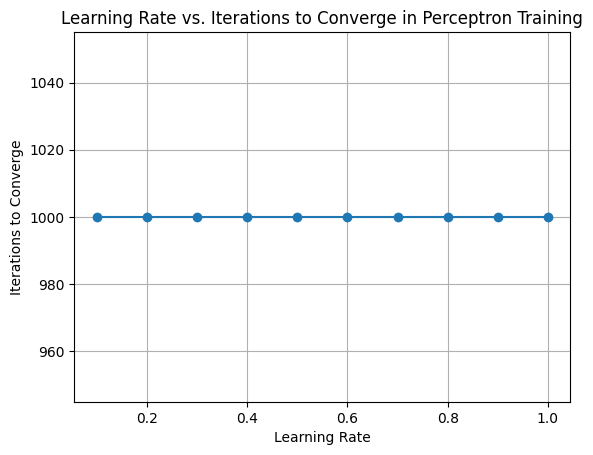

In [ ]:
#Ashik F
#BL.EN.U4CSE21032
#Contribution: Code + Comment Lines

#Question 3
'''  Repeat exercise A1 with varying the learning rate, keeping the initial weights same. Take learning
rate = {0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1}. Make a plot of the number of iterations taken for
learning to converge against the learning rates'''

import matplotlib.pyplot as plt
import numpy as np

# Initialize weights as we need same initial weights for all learning rates
W = [10, 0.2, -0.75]

# Define AND gate inputs and target outputs
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_target = [0, 0, 0, 1]

# Initialize variables for plotting
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
iterations_to_converge = []

# Training loop for different learning rates
max_epochs = 1000
convergence_error = 0.002
for lr in learning_rates:
    # Reset weights for each learning rate
    W = [10, 0.2, -0.75]
    epoch = 0
    converged = False
    while epoch < max_epochs:
        error_sum = 0
        for i in range(len(X)):
            # Calculate the predicted output
            dot_product = sum(W[j] * X[i][j] for j in range(len(X[i]))) + W[0]
            y_pred = 1 if dot_product >= 0 else 0

            # Update weights
            delta = lr * (y_target[i] - y_pred)
            W[0] += delta
            for j in range(1, len(W)):
                W[j] += delta * X[i][j - 1]

            # Calculate error for this sample
            error_sum += (y_target[i] - y_pred) ** 2

        # Calculate mean squared error for the epoch
        mean_squared_error = error_sum / len(X)

        # Check for convergence
        if mean_squared_error <= convergence_error:
            converged = True
            iterations_to_converge.append(epoch)
            break

        epoch += 1

    if not converged:
        iterations_to_converge.append(max_epochs)  # Mark as max_epochs if not converged

# Plot learning rates vs. iterations to converge
plt.plot(learning_rates, iterations_to_converge, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Iterations to Converge")
plt.title("Learning Rate vs. Iterations to Converge in Perceptron Training")
plt.grid(True)
plt.show()


In [ ]:
#Ashik F
#BL.EN.U4CSE21032
#Contribution: Code + Comment Lines

#Question 4
'''  Repeat the above exercises, A1 to A3, for XOR gate logic.'''

'  Repeat the above exercises, A1 to A3, for XOR gate logic.'

In [ ]:
#Ashik F
#BL.EN.U4CSE21032
#Contribution: Code + Comment Lines

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Ashik F
#BL.EN.U4CSE21032
#Contribution: Code + Comment Lines

# Function for A1
def QA1():
    # Initialize weights and learning rate
    W = [10, 0.2, -0.75]
    learning_rate = 0.05

    # Define XOR gate inputs and target outputs
    X = [[0, 0], [0, 1], [1, 0], [1, 1]]
    y_target = [0, 1, 1, 0]

    # Define step activation function
    def step_activation(x):
        return 1 if x >= 0 else 0 # provides a binary output based on a threshold

    # Initialize variables for plotting
    epochs = []
    errors = []

    # Training loop
    max_epochs = 1000
    convergence_error = 0.002
    epoch = 0

    while epoch < max_epochs:
        error_sum = 0

        for i in range(len(X)):
            # Calculate the predicted output
            dot_product = sum(W[j] * X[i][j] for j in range(len(X[i]))) + W[0]  # W0 is the bias term
            y_pred = step_activation(dot_product)

            # Update weights
            delta = learning_rate * (y_target[i] - y_pred)
            W[0] += delta  # Update the bias term
            for j in range(1, len(W)):
                W[j] += delta * X[i][j-1]

            # Calculate error for this sample
            error_sum += (y_target[i] - y_pred) ** 2

        # Calculate mean squared error for the epoch
        mean_squared_error = error_sum / len(X)

        # Append epoch and error values for plotting
        epochs.append(epoch)
        errors.append(mean_squared_error)

        # Check for convergence
        if mean_squared_error <= convergence_error:
            print(f"Converged after {epoch} epochs")
            break

        epoch += 1

    # Plot epochs vs. errors
    plt.plot(epochs, errors)
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.title("Epochs vs. Error in Perceptron Training")
    plt.grid(True)
    plt.show()

    # Plot the step activation function
    x_values = np.linspace(-2, 2, 400)
    y_values = [step_activation(x) for x in x_values]

    plt.subplot(2, 1, 2)
    plt.plot(x_values, y_values)
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.title("Step Activation Function")
    plt.grid(True)

    plt.tight_layout() # This is to provide proper spacing betweent he two plots
    plt.show()

In [ ]:
#Ashik F
#BL.EN.U4CSE21032
#Contribution: Code + Comment Lines

#Function for question A2
def QA2():
    # Initialize weights and learning rate
    W = [10, 0.2, -0.75]
    learning_rate = 0.05

    # Define XOR gate inputs and target outputs
    X = [[0, 0], [0, 1], [1, 0], [1, 1]]
    y_target = [0, 1, 1, 0]

    # Define activation functions
    def step_activation(x):
        return 1 if x >= 0 else 0

    def bipolar_step_activation(x):
        return 1 if x >= 0 else -1

    def sigmoid_activation(x):
        return 1 / (1 + np.exp(-x))

    def relu_activation(x):
        return max(0, x)

    # Initialize variables for plotting
    activation_functions = [step_activation, bipolar_step_activation, sigmoid_activation, relu_activation]
    activation_function_names = ["Step", "Bi-Polar Step", "Sigmoid", "ReLU"]
    convergence_epochs = []

    # Initialize max_epochs
    max_epochs = 1000
    convergence_error = 0.002  # Updated convergence error threshold

    # Training loop for each activation function
    for activation_function, activation_name in zip(activation_functions, activation_function_names):
        W = [10, 0.2, -0.75]  # Reset weights for each activation function
        epochs = []
        errors = []
        epoch = 0
        converged = False  # Track if convergence occurred

        while epoch < max_epochs:
            error_sum = 0

            for i in range(len(X)):
                # Calculate the predicted output using the current activation function
                dot_product = sum(W[j] * X[i][j] for j in range(len(X[i]))) + W[0]  # W0 is the bias term
                y_pred = activation_function(dot_product)

                # Update weights
                delta = learning_rate * (y_target[i] - y_pred)
                W[0] += delta  # Update the bias term
                for j in range(1, len(W)):
                    W[j] += delta * X[i][j-1]

                # Calculate error for this sample
                error_sum += (y_target[i] - y_pred) ** 2

            # Calculate mean squared error for the epoch
            mean_squared_error = error_sum / len(X)

            # Append epoch and error values for plotting
            epochs.append(epoch)
            errors.append(mean_squared_error)

            # Check for convergence
            if mean_squared_error <= convergence_error:
                print(f"{activation_name} converged after {epoch} epochs")
                convergence_epochs.append(epoch)
                converged = True
                break

            epoch += 1

        # If convergence didn't occur, append -1 and break if exceeding 1000 iterations
        if not converged:
            convergence_epochs.append(-1)
            if epoch >= max_epochs:
                break

    # Plot epochs vs. errors for each activation function
    plt.figure(figsize=(10, 5))
    for activation_name, epoch in zip(activation_function_names, convergence_epochs):
        label = f"{activation_name} ({epoch} epochs)" if epoch != -1 else f"{activation_name} (Did Not Converge)"
        plt.plot(epochs, errors, label=label)

    # Show the legend for the activation function plots
    plt.legend()

    # Plot convergence epochs for comparison
    plt.figure(figsize=(10, 5))
    plt.bar(activation_function_names, convergence_epochs)
    plt.xlabel("Activation Function")
    plt.ylabel("Convergence Epochs")
    plt.title("Comparison of Convergence Epochs for Different Activation Functions")
    plt.grid(True)
    plt.show()

In [ ]:
#Ashik F
#BL.EN.U4CSE21032
#Contribution: Code + Comment Lines

#Function for question A3
def QA3():
    # Initialize weights as we need same initial weights for all learning rates
    W = [10, 0.2, -0.75]

    # Define XOR gate inputs and target outputs
    X = [[0, 0], [0, 1], [1, 0], [1, 1]]
    y_target = [0, 1, 1, 0]

    # Initialize variables for plotting
    learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    iterations_to_converge = []

    # Training loop for different learning rates
    max_epochs = 1000
    convergence_error = 0.002
    for lr in learning_rates:
        # Reset weights for each learning rate
        W = [10, 0.2, -0.75]
        epoch = 0
        converged = False
        while epoch < max_epochs:
            error_sum = 0
            for i in range(len(X)):
                # Calculate the predicted output
                dot_product = sum(W[j] * X[i][j] for j in range(len(X[i]))) + W[0]
                y_pred = 1 if dot_product >= 0 else 0

                # Update weights
                delta = lr * (y_target[i] - y_pred)
                W[0] += delta
                for j in range(1, len(W)):
                    W[j] += delta * X[i][j - 1]

                # Calculate error for this sample
                error_sum += (y_target[i] - y_pred) ** 2

            # Calculate mean squared error for the epoch
            mean_squared_error = error_sum / len(X)

            # Check for convergence
            if mean_squared_error <= convergence_error:
                converged = True
                iterations_to_converge.append(epoch)
                break

            epoch += 1

        if not converged:
            iterations_to_converge.append(max_epochs)  # Mark as max_epochs if not converged

    # Plot learning rates vs. iterations to converge
    plt.plot(learning_rates, iterations_to_converge, marker='o')
    plt.xlabel("Learning Rate")
    plt.ylabel("Iterations to Converge")
    plt.title("Learning Rate vs. Iterations to Converge in Perceptron Training")
    plt.grid(True)
    plt.show()

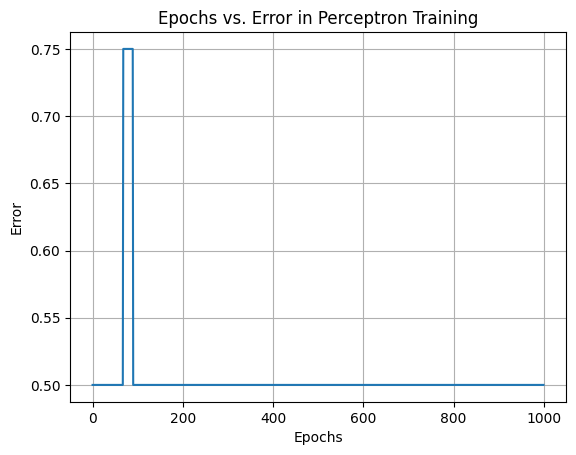

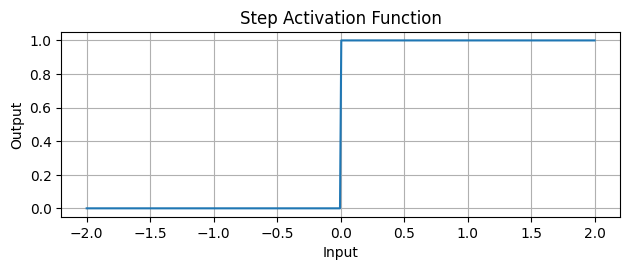

In [ ]:
#Ashik F
#BL.EN.U4CSE21032
#Contribution: Code + Comment Lines

QA1()

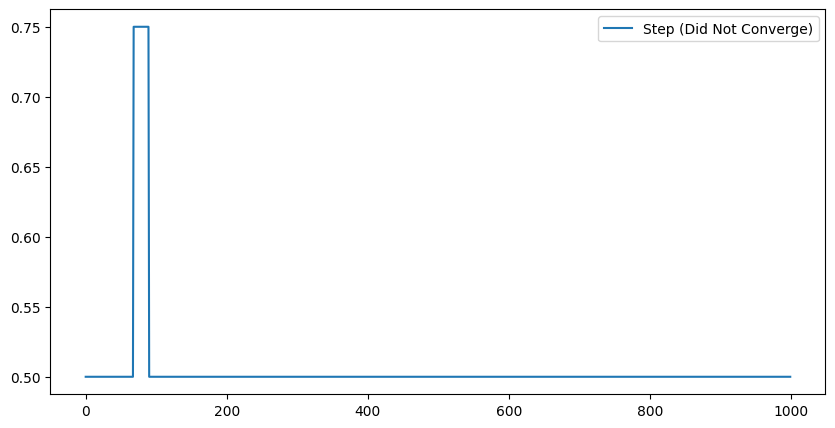

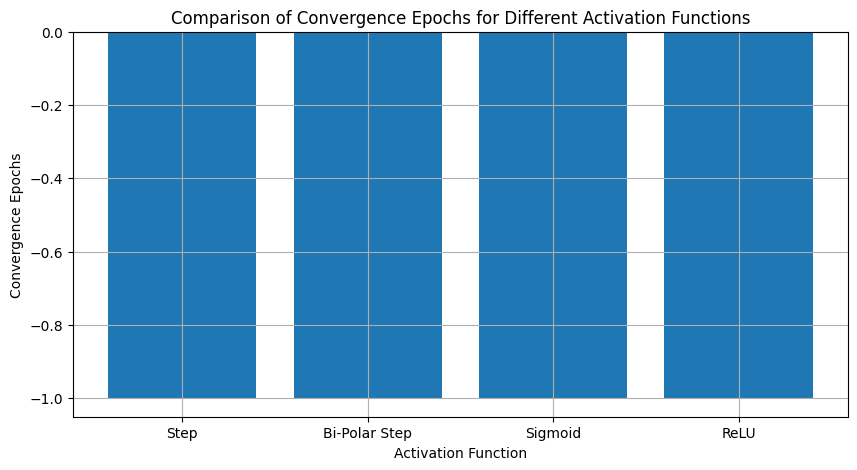

In [ ]:
#Ashik F
#BL.EN.U4CSE21032
#Contribution: Code + Comment Lines

QA2()

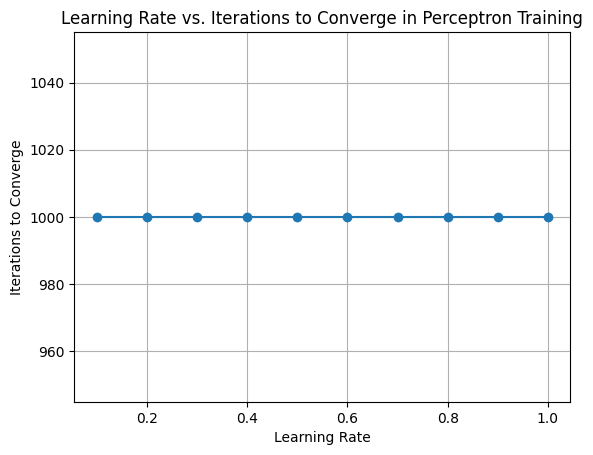

In [ ]:
#Ashik F
#BL.EN.U4CSE21032
#Contribution: Code + Comment Lines

QA3()

In [ ]:
#Ashik F
#BL.EN.U4CSE21032

#Question 11
'''  Use the MLPClassifier() function on your project dataset.'''

'  Use the MLPClassifier() function on your project dataset.'

In [ ]:
#Ashik F
#BL.EN.U4CSE21032
#Contribution: Code + Comment Lines

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer  # Import the SimpleImputer
import warnings  # Import the warnings module

# Ignore warnings
warnings.filterwarnings("ignore")

# Load  data and perform data preprocessing
e = pd.read_csv('em.csv')
l = pd.read_csv('l.csv', encoding='ANSI')  # The encoding for the CSV file was in ANSI format so an additional parameter was used
df = pd.concat([e, l], axis=1)  # Combine both datasets

n = ['embed_' + str(i) for i in range(768)]
# Calculate the mean
mean_values = df[n].mean()
# Create a dictionary with column names as keys and mean values as fill values.
# This is to prepare the mean values for filling missing (NaN) values in the DataFrame more efficiently.
fill_values = mean_values.to_dict()
# Fill missing values with the specified fill values using fillna() method
df.fillna(fill_values, inplace=True)
df_cleaned = df.dropna(subset=['Label'])  # Removing any rows with null values

# Select only numeric columns as features (excluding 'Id' and 'Label')
X = df_cleaned.select_dtypes(include=['number']).drop(columns=['Label'])
# Extract the 'Label' column as the target variable
y = df_cleaned['Label']

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess: Scale the features (standardization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Impute any remaining NaN values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create an MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Fit the classifier to the training data
model.fit(X_train, y_train)

# Predicting on the training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy for training and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print both the accuracies
print(f"Accuracy on training data: {train_accuracy:.2f}")
print(f"Accuracy on test data: {test_accuracy:.2f}")


Accuracy on training data: 1.00
Accuracy on test data: 0.61


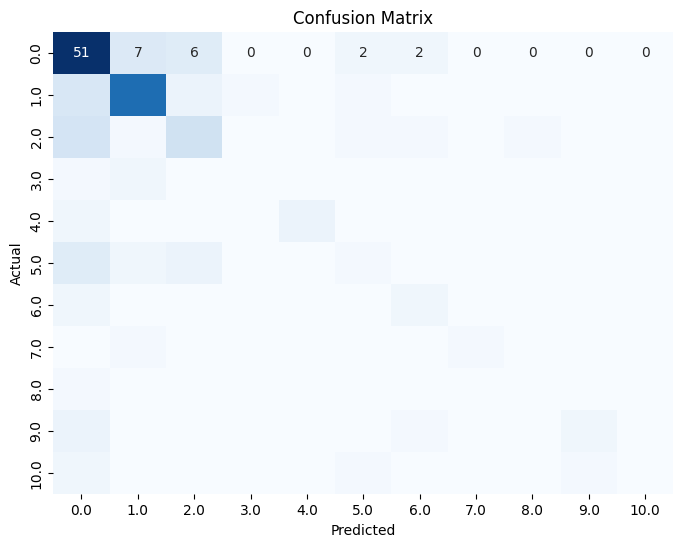

In [ ]:
#Ashik F
#BL.EN.U4CSE21032
#Contribution: Code + Comment Lines

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix for the test data
confusion = confusion_matrix(y_test, y_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Save the graph as an image file (e.g., PNG)
plt.savefig('confusion_matrix.png')
plt.show()


In [ ]:
#Ashik F
#BL.EN.U4CSE21032
#Contribution: Code + Comment Lines

#Angelina George
#BL.EN.U4CSE21017
#Contribution: Explanation of Results (Accuracy)

"""
Observation 1.a:

Both Ashik and Angelina have worked on question 11. In the code provided here, we notice that the accuracy is 61% (ignoring decimals)
We have observed this result by utilising ANSI Encoding + Simple Imputer...
However, we observe different results when we don't use the above mentioned aspects..., which will be shown later on as Angelina's code arrives..."""

import numpy as np
epochs_list = []
weight_changes = []
error_list = []
accuracy_list = []

# Training the MLP model
epochs = 100
for epoch in range(epochs):
    model.partial_fit(X_train, y_train, classes=np.unique(y_train))

    # Calculate accuracy
    accuracy = accuracy_score(y_test, model.predict(X_test))

    # Append values to lists
    epochs_list.append(epoch)
    weight_changes.append(np.sum(np.abs(model.coefs_[0])))
    error_list.append(1 - accuracy)
    accuracy_list.append(accuracy)

    # Print the error and accuracy for this epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Error = {1 - accuracy}, Accuracy = {accuracy * 100:.2f}%")


Epoch 0: Error = 0.4, Accuracy = 60.00%
Epoch 10: Error = 0.38888888888888884, Accuracy = 61.11%
Epoch 20: Error = 0.3833333333333333, Accuracy = 61.67%
Epoch 30: Error = 0.3833333333333333, Accuracy = 61.67%
Epoch 40: Error = 0.3833333333333333, Accuracy = 61.67%
Epoch 50: Error = 0.3833333333333333, Accuracy = 61.67%
Epoch 60: Error = 0.3833333333333333, Accuracy = 61.67%
Epoch 70: Error = 0.3833333333333333, Accuracy = 61.67%
Epoch 80: Error = 0.3833333333333333, Accuracy = 61.67%
Epoch 90: Error = 0.3833333333333333, Accuracy = 61.67%


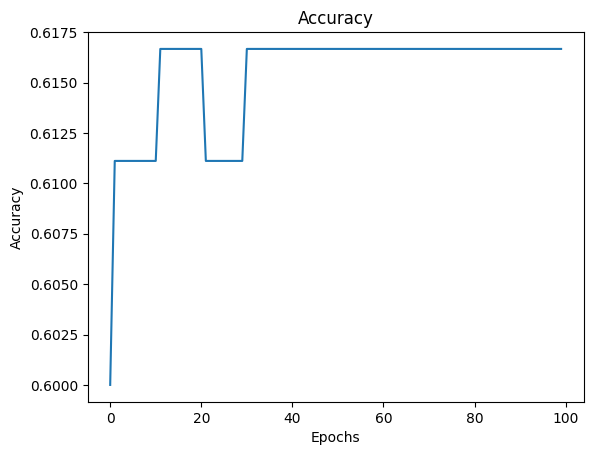

In [ ]:
#Ashik F
#BL.EN.U4CSE21032
#Contribution: Code + Comment Lines

plt.figure()
    # Customize your plot here using epochs_list and accuracy_list
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
    # Plot the data
plt.plot(epochs_list, accuracy_list)
    # Save the plot as a PNG file
plt.savefig("accuracy+plot.png")

In [ ]:
#Alphonsa Jose
#BL.EN.U4CSE21013
#Contribution: Code + Comment Lines

#Question A5

#-----------------------------

import pandas as pd
import numpy as np

# Step 1: Create a DataFrame from the provided data
data = {
    'Customer': ['C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8', 'C_9', 'C_10'],
    'Candies (#)': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes (kg)': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'Milk Packets (#)': [2, 6, 2, 2, 2, 5, 2, 2, 4, 4],
    'Payment (Rs)': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    'High Value (Tx)': ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No']
}

df = pd.DataFrame(data)

# Step 2: Data Preprocessing
# Encode the target variable 'High Value (Tx)' to 1 for 'Yes' and 0 for 'No'
df['High Value (Tx)'] = df['High Value (Tx)'].map({'Yes': 1, 'No': 0})

# Normalize the numerical features (Candies (#), Mangoes (kg), Milk Packets (#), Payment (Rs))
numerical_features = ['Candies (#)', 'Mangoes (kg)', 'Milk Packets (#)', 'Payment (Rs)']
df[numerical_features] = (df[numerical_features] - df[numerical_features].mean()) / df[numerical_features].std()

# Step 3: Initialize Weights and Bias
np.random.seed(0)
num_features = len(numerical_features)
weights = np.random.rand(num_features)
bias = np.random.rand()

# Step 4: Define the Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Step 5: Define the Perceptron Model
def perceptron(input_features, weights, bias):
    return sigmoid(np.dot(input_features, weights) + bias)

# Step 6: Define the Binary Cross-Entropy Loss Function
def loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Step 7: Training the Perceptron
learning_rate = 0.1
num_epochs = 1000

X = df[numerical_features].values
y = df['High Value (Tx)'].values

for epoch in range(num_epochs):
    # Forward pass
    predictions = perceptron(X, weights, bias)

    # Calculate the loss
    error = loss(y, predictions)

    # Gradient descent to update weights and bias
    gradient = np.dot(X.T, (predictions - y)) / len(y)
    weights -= learning_rate * gradient
    bias -= learning_rate * np.mean(predictions - y)

    # Print the loss at each epoch (optional)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {error}")

# Step 8: Make Predictions (using the trained perceptron)
# You can use the trained perceptron to make predictions on new data or evaluate on the existing data.

Epoch 0, Loss: 0.4161388411334396
Epoch 100, Loss: 0.12069006865468915
Epoch 200, Loss: 0.0792668659775606
Epoch 300, Loss: 0.06074600493288359
Epoch 400, Loss: 0.04975000538380399
Epoch 500, Loss: 0.04231400066933357
Epoch 600, Loss: 0.03689439044034941
Epoch 700, Loss: 0.0327459700242789
Epoch 800, Loss: 0.029457943434548793
Epoch 900, Loss: 0.026782576791196548


In [ ]:
#Alphonsa Jose
#BL.EN.U4CSE21013
#Contribution: Code + Comment Lines

#Question A5 (continuation)

#-----------------------------
import numpy as np
#each input feature is assigned a weight.



class Perceptron:
    def __init__(self, num_features):
        self.weights = np.random.rand(num_features)
        self.bias = np.random.rand()

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def predict(self, input_features):
        return self.sigmoid(np.dot(input_features, self.weights) + self.bias)

    def loss(self, y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def train(self, X, y, learning_rate, num_epochs):
        for epoch in range(num_epochs):
            # Forward pass
            predictions = self.predict(X)

            # Calculate the loss
            error = self.loss(y, predictions)

            # Gradient descent to update weights and bias
            gradient = np.dot(X.T, (predictions - y)) / len(y)
            self.weights -= learning_rate * gradient
            self.bias -= learning_rate * np.mean(predictions - y)

            # Print the loss at each epoch (optional)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {error}")

# Example usage:
numerical_features = ['Candies (#)', 'Mangoes (kg)', 'Milk Packets (#)', 'Payment (Rs)']
X = df[numerical_features].values
y = df['High Value (Tx)'].values

perceptron_model = Perceptron(num_features=len(numerical_features))
perceptron_model.train(X, y, learning_rate=0.1, num_epochs=1000)


Epoch 0, Loss: 0.4607266308088649
Epoch 100, Loss: 0.11632762688739122
Epoch 200, Loss: 0.07575556223627009
Epoch 300, Loss: 0.0582508366502702
Epoch 400, Loss: 0.04791472815616214
Epoch 500, Loss: 0.040913784043544094
Epoch 600, Loss: 0.03579332991505706
Epoch 700, Loss: 0.031858655276917926
Epoch 800, Loss: 0.02872834590793631
Epoch 900, Loss: 0.02617252470637013


In [ ]:
#Alphonsa Jose
#BL.EN.U4CSE21013
#Contribution: Code + Comment Lines

#Question A6

#-----------------------------
import numpy as np

# Sample data (replace with your dataset)
X = np.array([[20, 6, 2, 386],
              [16, 3, 6, 289],
              [27, 6, 2, 393],
              [19, 1, 2, 110],
              [24, 4, 2, 280],
              [22, 1, 5, 167],
              [15, 4, 2, 271],
              [18, 4, 2, 274],
              [21, 1, 4, 148],
              [16, 2, 4, 198]])

y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Adding a bias term to the input features
X = np.column_stack((X, np.ones(len(X))))

# Calculate the weights using the matrix pseudo-inverse method
weights = np.dot(np.linalg.pinv(X), y)

# Make predictions using the calculated weights
def predict(input_features):
    input_features = np.column_stack((input_features, np.ones(len(input_features))))
    return np.round(np.dot(input_features, weights))

# Test the model with new data (replace with your test data)
new_data = np.array([[25, 5, 2, 350],
                     [18, 2, 3, 220]])

predictions_matrix_pseudo_inverse = predict(new_data)
print("Matrix Pseudo-Inverse Predictions:", predictions_matrix_pseudo_inverse)



Matrix Pseudo-Inverse Predictions: [1. 0.]


In [ ]:
#Alphonsa Jose
#BL.EN.U4CSE21013
#Contribution: Code + Comment Lines

#Question A7

#-----------------------------


"""A7. Develop the below Neural Network. Use learning rate (α) = 0.05 with a Sigmoid activation
function. Learn the weights of the network using back-propagation algorithm to implement above
provided AND gate logic."""

import numpy as np

# Define the Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Initialize weights and bias randomly
np.random.seed(0)  # For reproducibility
weights = np.random.randn(2)
bias = np.random.randn()

# Define the learning rate
learning_rate = 0.05

# Define the training data for the AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Training the network
epochs = 10000
for epoch in range(epochs):
    # Forward pass
    output = sigmoid(np.dot(X, weights) + bias)

    # Compute Mean Squared Error (MSE) loss
    loss = np.mean((output - y) ** 2)

    # Backpropagation
    gradient = 2 * (output - y) * output * (1 - output)
    weights -= learning_rate * np.dot(X.T, gradient)
    bias -= learning_rate * np.sum(gradient)

    # Print loss for monitoring (optional)
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Testing the network
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predictions = np.round(sigmoid(np.dot(test_data, weights) + bias))

# Display the predictions for the AND gate logic
print("Predictions for AND gate:")
for i in range(len(test_data)):
    print(f"Input: {test_data[i]}, Output: {int(predictions[i])}")

Epoch 0, Loss: 0.5127015207917572
Epoch 1000, Loss: 0.031408312007585606
Epoch 2000, Loss: 0.015556508845454644
Epoch 3000, Loss: 0.010004394123839917
Epoch 4000, Loss: 0.007275206326719245
Epoch 5000, Loss: 0.005677352606126222
Epoch 6000, Loss: 0.0046366911655306
Epoch 7000, Loss: 0.003908619524153707
Epoch 8000, Loss: 0.0033724026845935295
Epoch 9000, Loss: 0.002961944968380822
Predictions for AND gate:
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1


In [ ]:
"""Rough Work"""

#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines

#Lab-5 (2 weeks assignment)

#---------------------------------------------

#A6 is related to A5

#This is A5
"""A5. Use customer data provided below. Build a perceptron & learn to classify the transactions as high or low value as provided in the below table.
Use sigmoid as the activation function. Initialize the weights & learning rate with your choice."""

#---------------------------------------------

# Question A6

import pandas as pd
import numpy as np
# A function to create the dataframe
def createdataframe():
    # Create a DataFrame for the dataset
    dataset = {
        'Customer': ['C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8', 'C_9', 'C_10'],
        'Candies (#)': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
        'Mangoes (kg)': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
        'Milk Packets (#)': [2, 6, 2, 2, 2, 5, 2, 2, 4, 4],
        'Payment (Rs)': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198]
    }
    df = pd.DataFrame(dataset)
    return df

#Main Program
dftest=createdataframe()
print("\nThe dataframe loaded is as follows:\n")
print(dftest)


The dataframe loaded is as follows:

  Customer  Candies (#)  Mangoes (kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280
5      C_6           22             1                 5           167
6      C_7           15             4                 2           271
7      C_8           18             4                 2           274
8      C_9           21             1                 4           148
9     C_10           16             2                 4           198


In [ ]:
#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------

#Defining a function that will be useful for our model:
import pandas as pd
e=pd.read_excel('embeddingsdata.xlsx') #Embedded Dataset


    #Original Dataset
l = pd.read_excel('Modified_Dataset to B.tech.xlsx') # The encoding for the csv file was in ANSI format so i had to give an additional parameter here

def mergedatasets(e, l):
    df = pd.concat([e, l], axis=1)# combining both the datasets

    print("\n The required dataset that is made from merging the original dataset, and the embedded dataset, on the basis of Judgment Status attribute is:\n")
    print(df)
    return df

#Main program
mdf=mergedatasets(e, l)


 The required dataset that is made from merging the original dataset, and the embedded dataset, on the basis of Judgment Status attribute is:

      embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0    0.009625 -0.029216  0.027109  0.023631 -0.004972  0.031757 -0.045125   
1   -0.007535 -0.039844  0.030167  0.031224  0.004742  0.028289 -0.068723   
2    0.022408 -0.030840  0.032328  0.046965  0.007798  0.025860 -0.065093   
3    0.019677 -0.034055  0.012662  0.070387 -0.011170  0.017842 -0.050945   
4    0.017678 -0.030323  0.012829  0.065267 -0.025161  0.011964 -0.050590   
..        ...       ...       ...       ...       ...       ...       ...   
895  0.019743 -0.071799  0.022546  0.049042 -0.005767 -0.016275 -0.037731   
896  0.000186 -0.027604  0.010623  0.038237 -0.026675  0.020215 -0.040816   
897  0.018066 -0.032152  0.039794  0.047608  0.003898  0.024092 -0.056508   
898 -0.003492 -0.022739  0.021777  0.044054 -0.005621  0.013863 -0.079196   
899  0.01

In [ ]:
#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------
# Define the step activation function
def step_activation(z):
    return 1 if z >= 0 else 0

In [ ]:
#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------

# Define a function to plot Change in Weights vs. Epochs
def plot_weight_changes(epochs_list, weight_changes):
    plt.figure()
    plt.plot(epochs_list, weight_changes, label='Change in Weights', color='b')
    plt.xlabel('Epochs')
    plt.ylabel('Change in Weights')
    plt.title('Change in Weights over Epochs')
    plt.legend()
    plt.grid()
    plt.show()
    print("Graph: Change in Weights vs. Epochs")

In [ ]:
#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------

# Define a function to plot Error vs. Epochs
def plot_error(epochs_list, error_list):
    plt.figure()
    plt.plot(epochs_list, error_list, label='Error', color='r')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('Error over Epochs')
    plt.legend()
    plt.grid()
    plt.show()
    print("Graph: Error vs. Epochs")

In [ ]:
#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------

# Define a function to plot Decision Boundary
def plot_decision_boundary(X, y, W0, W1, W2):
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = step_activation(W0 + np.dot(np.c_[xx.ravel(), yy.ravel()], np.array([W1, W2])))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()
    print("Graph: Decision Boundary")

In [ ]:
#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------

# Define a function to plot Learning Rate vs. Epochs
def plot_learning_rate(epochs_list, learning_rate):
    plt.figure()
    plt.plot(epochs_list, [learning_rate] * len(epochs_list), label='Learning Rate', color='g')
    plt.xlabel('Epochs')
    plt.ylabel('Learning Rate')
    plt.title('Learning Rate over Epochs')
    plt.legend()
    plt.grid()
    plt.show()
    print("Graph: Learning Rate vs. Epochs")

In [ ]:
#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------

# Define a function to plot Accuracy vs. Epochs
def plot_accuracy(epochs_list, accuracy_list):
    plt.figure()
    plt.plot(epochs_list, [accuracy * 100 for accuracy in accuracy_list], label='Accuracy', color='m')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy over Epochs')
    plt.legend()
    plt.grid()
    plt.show()
    print("Graph: Accuracy vs. Epochs")

Epoch 0: Error = 2, Accuracy = 50.0%
Epoch 10: Error = 2, Accuracy = 50.0%
Epoch 20: Error = 2, Accuracy = 50.0%
Epoch 30: Error = 2, Accuracy = 50.0%
Epoch 40: Error = 2, Accuracy = 50.0%
Epoch 50: Error = 1, Accuracy = 75.0%
Epoch 60: Error = 1, Accuracy = 75.0%
Epoch 70: Error = 1, Accuracy = 75.0%
Epoch 80: Error = 1, Accuracy = 75.0%
Epoch 90: Error = 2, Accuracy = 50.0%
Final weights:
W0 = 2.8999999999999906, W1 = -2.1500000000000004, W2 = -2.849999999999998
Testing the perceptron on XOR logic:
Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 0


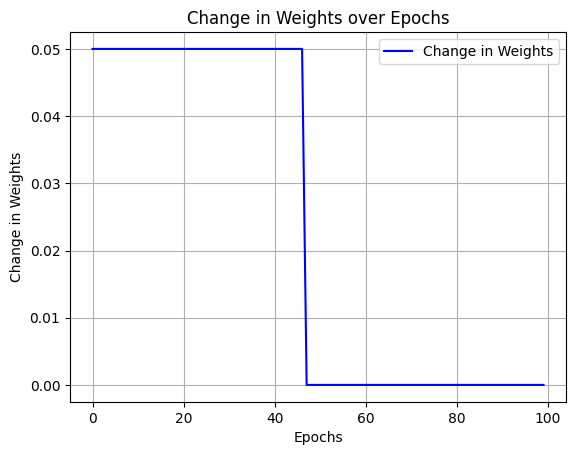

Graph: Change in Weights vs. Epochs


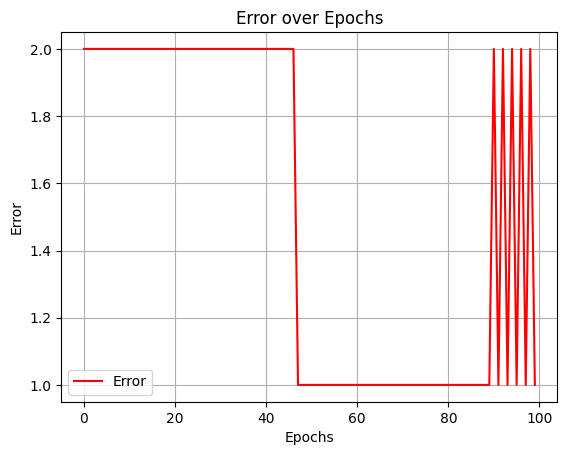

Graph: Error vs. Epochs


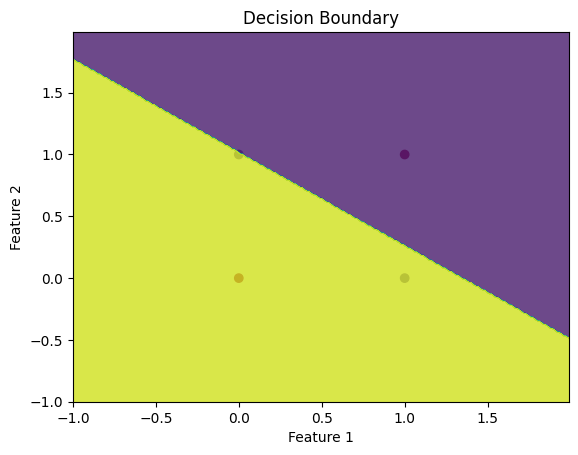

Graph: Decision Boundary


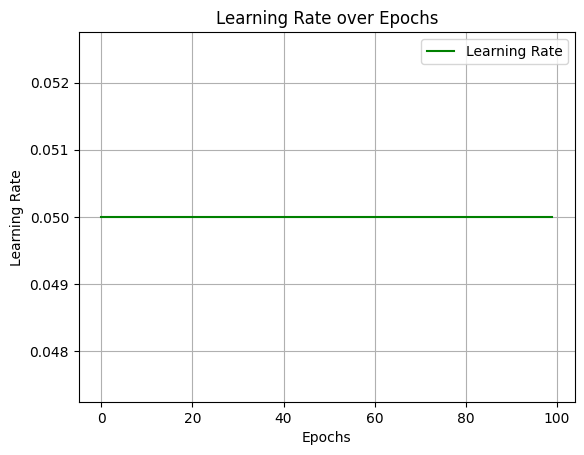

Graph: Learning Rate vs. Epochs


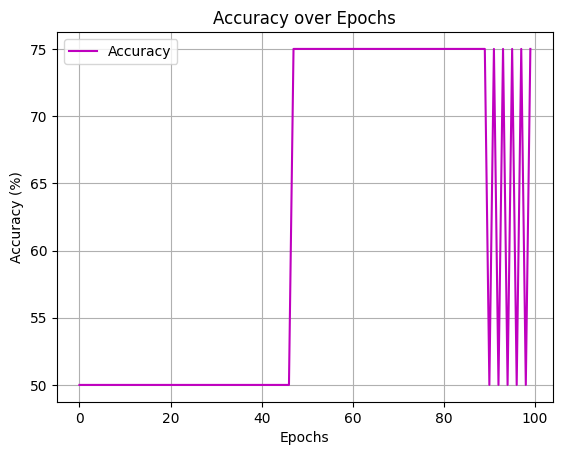

Graph: Accuracy vs. Epochs


In [ ]:
""" A8. Repeat the above A1 experiment for XOR Gate logic. Keep the learning rate & activation function same as A1. """

"""A1. Develop the above perceptron in your own code (don’t use the perceptron model available from package). Use the initial weights as provided below.
W0 = 10, W1 = 0.2, w2 = -0.75, learning rate (α) = 0.05
Use Step activation function to learn the weights of the network to implement above provided AND gate logic.
The activation function is demonstrated below."""


#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------

#Repeating A1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define XOR dataset and target outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Initialize weights and bias
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Define the step activation function
def step_activation(z):
    return np.where(z >= 0, 1, 0)

# Lists to store changes in weights and epochs
weight_changes = []
epochs_list = []

# Lists to store error and accuracy for plotting
error_list = []
accuracy_list = []

# Training the perceptron for XOR logic
epochs = 100
for epoch in range(epochs):
    error = 0
    correct_predictions = 0
    for i in range(len(X)):
        # Forward pass
        input_layer = X[i]
        z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
        output = step_activation(z1)  # Apply step activation function

        # Compute the error
        delta = y[i] - output
        error += delta ** 2

        # Update weights
        W0 += learning_rate * delta
        W1 += learning_rate * delta * input_layer[0]
        W2 += learning_rate * delta * input_layer[1]

        # Count correct predictions
        if y[i] == output:
            correct_predictions += 1

    # Append the weight change and epoch number
    weight_changes.append(abs(learning_rate * delta))
    epochs_list.append(epoch)

    # Calculate accuracy and append to list
    accuracy = correct_predictions / len(X)
    accuracy_list.append(accuracy)

    # Append error for this epoch
    error_list.append(error)

    # Print the error and accuracy for this epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Error = {error}, Accuracy = {accuracy * 100}%")

# Test the perceptron
print("Final weights:")
print(f"W0 = {W0}, W1 = {W1}, W2 = {W2}")

print("Testing the perceptron on XOR logic:")
for i in range(len(X)):
    input_layer = X[i]
    z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
    output = step_activation(z1)  # Apply step activation function
    print(f"Input: {input_layer}, Predicted Output: {output}")

# Define a function to plot Change in Weights vs. Epochs
def plot_weight_changes(epochs_list, weight_changes):
    plt.figure()
    plt.plot(epochs_list, weight_changes, label='Change in Weights', color='b')
    plt.xlabel('Epochs')
    plt.ylabel('Change in Weights')
    plt.title('Change in Weights over Epochs')
    plt.legend()
    plt.grid()
    plt.show()
    print("Graph: Change in Weights vs. Epochs")

# Define a function to plot Error vs. Epochs
def plot_error(epochs_list, error_list):
    plt.figure()
    plt.plot(epochs_list, error_list, label='Error', color='r')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('Error over Epochs')
    plt.legend()
    plt.grid()
    plt.show()
    print("Graph: Error vs. Epochs")

# Define a function to plot Decision Boundary
def plot_decision_boundary(X, y, W0, W1, W2):
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = step_activation(W0 + np.dot(np.c_[xx.ravel(), yy.ravel()], np.array([W1, W2])))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()
    print("Graph: Decision Boundary")

# Define a function to plot Learning Rate vs. Epochs
def plot_learning_rate(epochs_list, learning_rate):
    plt.figure()
    plt.plot(epochs_list, [learning_rate] * len(epochs_list), label='Learning Rate', color='g')
    plt.xlabel('Epochs')
    plt.ylabel('Learning Rate')
    plt.title('Learning Rate over Epochs')
    plt.legend()
    plt.grid()
    plt.show()
    print("Graph: Learning Rate vs. Epochs")

# Define a function to plot Accuracy vs. Epochs
def plot_accuracy(epochs_list, accuracy_list):
    plt.figure()
    plt.plot(epochs_list, [accuracy * 100 for accuracy in accuracy_list], label='Accuracy', color='m')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy over Epochs')
    plt.legend()
    plt.grid()
    plt.show()
    print("Graph: Accuracy vs. Epochs")

# Plotting the graphs
plot_weight_changes(epochs_list, weight_changes)
plot_error(epochs_list, error_list)
plot_decision_boundary(X, y, W0, W1, W2)
plot_learning_rate(epochs_list, learning_rate)
plot_accuracy(epochs_list, accuracy_list)



Epoch 0: Error = 2, Accuracy = 50.0%
Epoch 10: Error = 2, Accuracy = 50.0%
Epoch 20: Error = 2, Accuracy = 50.0%
Epoch 30: Error = 2, Accuracy = 50.0%
Epoch 40: Error = 2, Accuracy = 50.0%
Epoch 50: Error = 2, Accuracy = 50.0%
Epoch 60: Error = 2, Accuracy = 50.0%
Epoch 70: Error = 2, Accuracy = 50.0%
Epoch 80: Error = 1, Accuracy = 75.0%
Epoch 90: Error = 1, Accuracy = 75.0%
Final weights:
W0 = 2.499999999999992, W1 = 0.8000000000000002, W2 = -3.2499999999999964
Testing the perceptron on XOR logic:
Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: 0
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 1


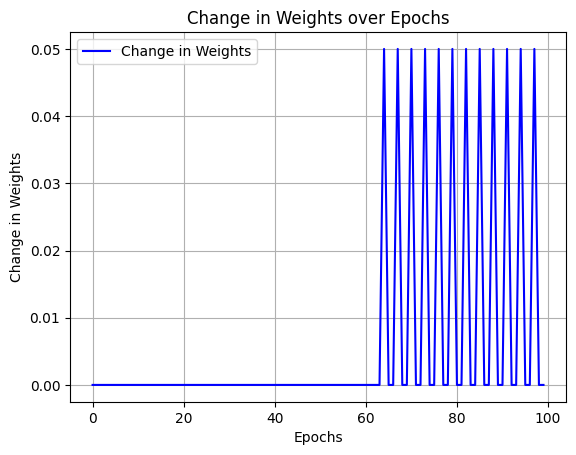

Graph: Change in Weights vs. Epochs


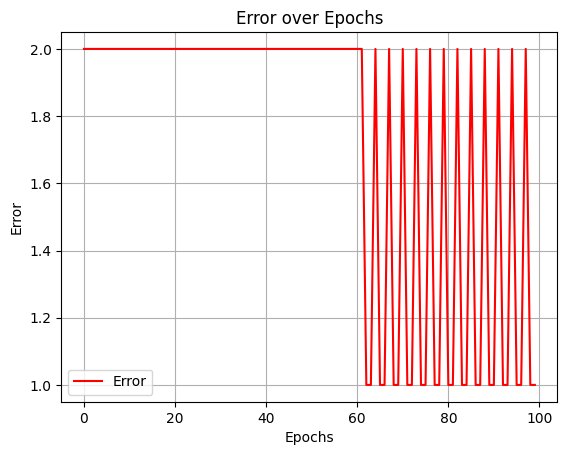

Graph: Error vs. Epochs


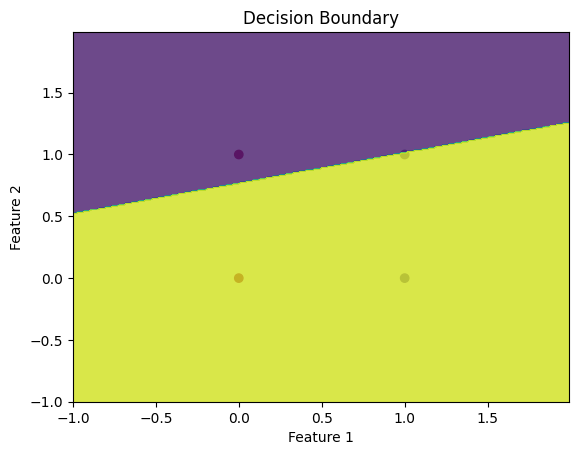

Graph: Decision Boundary


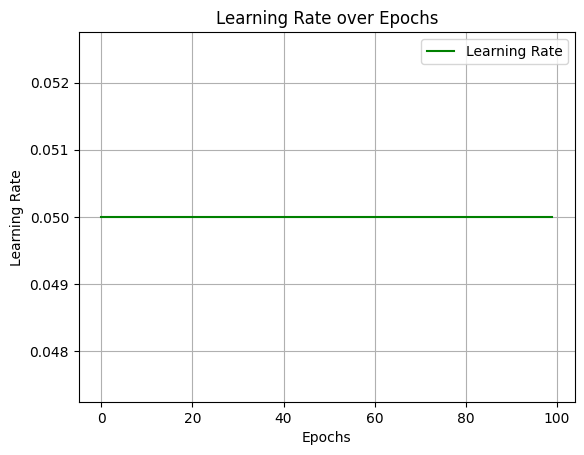

Graph: Learning Rate vs. Epochs


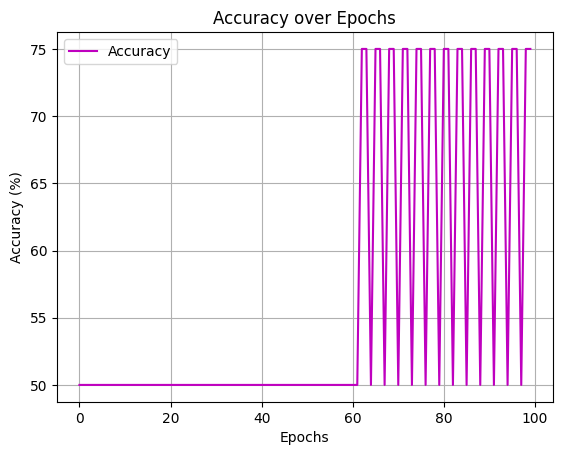

Graph: Accuracy vs. Epochs


In [ ]:
"""A9. Repeat exercise A1 & A2 with 2 output nodes (as shown below). A zero output of logic gate maps
to [O1 O2] = [1 0] from output layer while a one output from logic gate maps to [0 1]."""

#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------


#I have put [0,0] as 0 and [1,1] as 1 here. (1/4) possibilities
#Repeating A1

"""A1. Develop the above perceptron in your own code (don’t use the perceptron model available from package). Use the initial weights as provided below.
W0 = 10, W1 = 0.2, w2 = -0.75, learning rate (α) = 0.05
Use Step activation function to learn the weights of the network to implement above provided AND gate logic.
The activation function is demonstrated below."""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define XOR dataset and target outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 1, 1]) #I have put [0,0] as 0 and [1,1] as 1 here.

# Initialize weights and bias
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Define the step activation function
def step_activation(z):
    return np.where(z >= 0, 1, 0)

# Lists to store changes in weights and epochs
weight_changes = []
epochs_list = []

# Lists to store error and accuracy for plotting
error_list = []
accuracy_list = []

# Training the perceptron for XOR logic
epochs = 100
for epoch in range(epochs):
    error = 0
    correct_predictions = 0
    for i in range(len(X)):
        # Forward pass
        input_layer = X[i]
        z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
        output = step_activation(z1)  # Apply step activation function

        # Compute the error
        delta = y[i] - output
        error += delta ** 2

        # Update weights
        W0 += learning_rate * delta
        W1 += learning_rate * delta * input_layer[0]
        W2 += learning_rate * delta * input_layer[1]

        # Count correct predictions
        if y[i] == output:
            correct_predictions += 1

    # Append the weight change and epoch number
    weight_changes.append(abs(learning_rate * delta))
    epochs_list.append(epoch)

    # Calculate accuracy and append to list
    accuracy = correct_predictions / len(X)
    accuracy_list.append(accuracy)

    # Append error for this epoch
    error_list.append(error)

    # Print the error and accuracy for this epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Error = {error}, Accuracy = {accuracy * 100}%")

# Test the perceptron
print("Final weights:")
print(f"W0 = {W0}, W1 = {W1}, W2 = {W2}")

print("Testing the perceptron on XOR logic:")
for i in range(len(X)):
    input_layer = X[i]
    z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
    output = step_activation(z1)  # Apply step activation function
    print(f"Input: {input_layer}, Predicted Output: {output}")

# Plotting the graphs
plot_weight_changes(epochs_list, weight_changes)
plot_error(epochs_list, error_list)
plot_decision_boundary(X, y, W0, W1, W2)
plot_learning_rate(epochs_list, learning_rate)
plot_accuracy(epochs_list, accuracy_list)



Epoch 0: Error = 2, Accuracy = 50.0%
Epoch 10: Error = 2, Accuracy = 50.0%
Epoch 20: Error = 2, Accuracy = 50.0%
Epoch 30: Error = 2, Accuracy = 50.0%
Epoch 40: Error = 1, Accuracy = 75.0%
Epoch 50: Error = 1, Accuracy = 75.0%
Epoch 60: Error = 0, Accuracy = 100.0%
Epoch 70: Error = 0, Accuracy = 100.0%
Epoch 80: Error = 0, Accuracy = 100.0%
Epoch 90: Error = 0, Accuracy = 100.0%
Final weights:
W0 = 5.349999999999982, W1 = -1.7000000000000008, W2 = -5.399999999999989
Testing the perceptron on XOR logic:
Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: 0
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 0


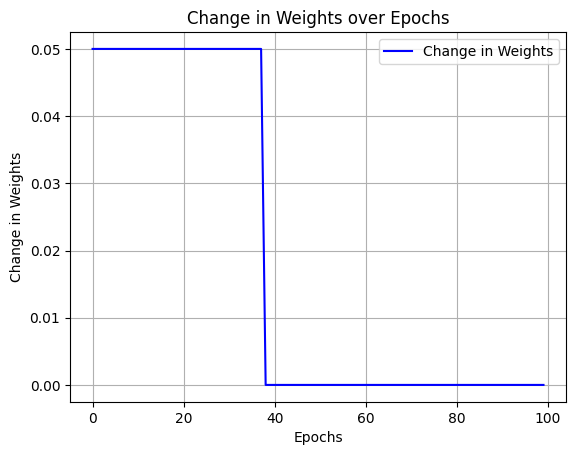

Graph: Change in Weights vs. Epochs


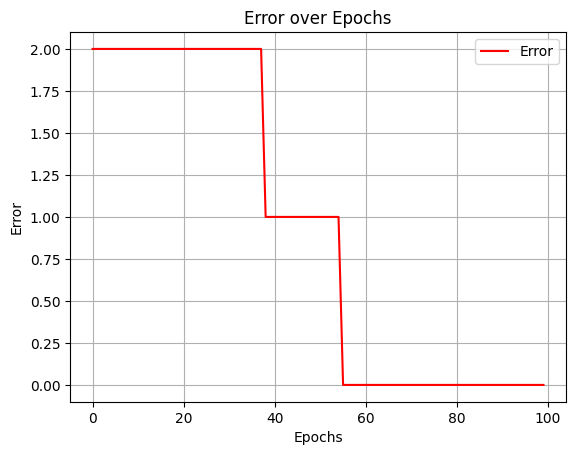

Graph: Error vs. Epochs


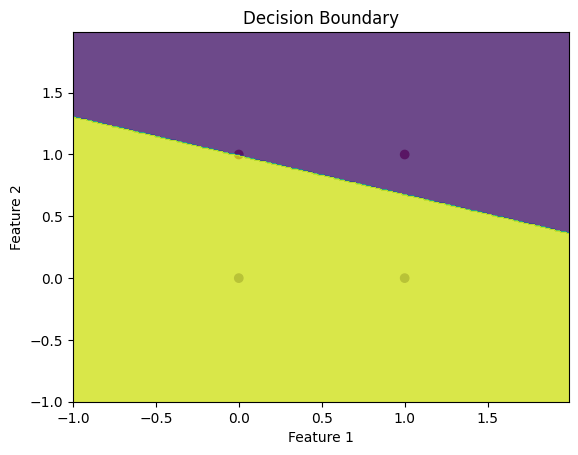

Graph: Decision Boundary


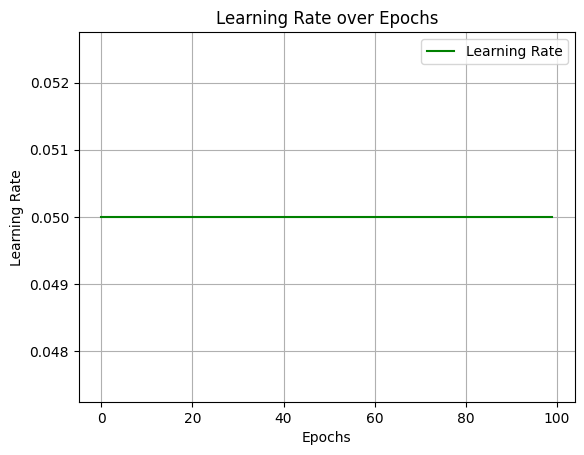

Graph: Learning Rate vs. Epochs


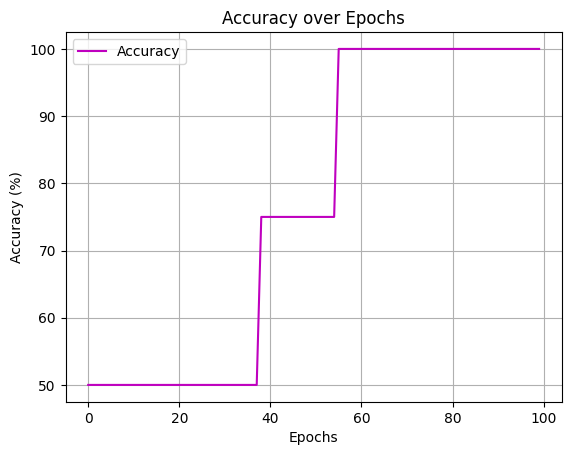

Graph: Accuracy vs. Epochs


In [ ]:
"""Same question"""

#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------

#I have put [0,0] as 1 and [1,1] as 0 here (since not mentioned). Trying the other posibility (2/4)
#Repeating A1

"""A1. Develop the above perceptron in your own code (don’t use the perceptron model available from package). Use the initial weights as provided below.
W0 = 10, W1 = 0.2, w2 = -0.75, learning rate (α) = 0.05
Use Step activation function to learn the weights of the network to implement above provided AND gate logic.
The activation function is demonstrated below."""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define XOR dataset and target outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([1, 0, 1, 0]) #I have put [0,0] as 0 and [1,1] as 1 here.

# Initialize weights and bias
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Define the step activation function
def step_activation(z):
    return np.where(z >= 0, 1, 0)

# Lists to store changes in weights and epochs
weight_changes = []
epochs_list = []

# Lists to store error and accuracy for plotting
error_list = []
accuracy_list = []

# Training the perceptron for XOR logic
epochs = 100
for epoch in range(epochs):
    error = 0
    correct_predictions = 0
    for i in range(len(X)):
        # Forward pass
        input_layer = X[i]
        z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
        output = step_activation(z1)  # Apply step activation function

        # Compute the error
        delta = y[i] - output
        error += delta ** 2

        # Update weights
        W0 += learning_rate * delta
        W1 += learning_rate * delta * input_layer[0]
        W2 += learning_rate * delta * input_layer[1]

        # Count correct predictions
        if y[i] == output:
            correct_predictions += 1

    # Append the weight change and epoch number
    weight_changes.append(abs(learning_rate * delta))
    epochs_list.append(epoch)

    # Calculate accuracy and append to list
    accuracy = correct_predictions / len(X)
    accuracy_list.append(accuracy)

    # Append error for this epoch
    error_list.append(error)

    # Print the error and accuracy for this epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Error = {error}, Accuracy = {accuracy * 100}%")

# Test the perceptron
print("Final weights:")
print(f"W0 = {W0}, W1 = {W1}, W2 = {W2}")

print("Testing the perceptron on XOR logic:")
for i in range(len(X)):
    input_layer = X[i]
    z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
    output = step_activation(z1)  # Apply step activation function
    print(f"Input: {input_layer}, Predicted Output: {output}")

# Plotting the graphs
plot_weight_changes(epochs_list, weight_changes)
plot_error(epochs_list, error_list)
plot_decision_boundary(X, y, W0, W1, W2)
plot_learning_rate(epochs_list, learning_rate)
plot_accuracy(epochs_list, accuracy_list)



Epoch 0: Error = 1, Accuracy = 75.0%
Epoch 10: Error = 1, Accuracy = 75.0%
Epoch 20: Error = 1, Accuracy = 75.0%
Epoch 30: Error = 1, Accuracy = 75.0%
Epoch 40: Error = 1, Accuracy = 75.0%
Epoch 50: Error = 1, Accuracy = 75.0%
Epoch 60: Error = 1, Accuracy = 75.0%
Epoch 70: Error = 1, Accuracy = 75.0%
Epoch 80: Error = 1, Accuracy = 75.0%
Epoch 90: Error = 1, Accuracy = 75.0%
Final weights:
W0 = 5.349999999999982, W1 = 0.2, W2 = -5.399999999999989
Testing the perceptron on XOR logic:
Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: 0
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 1


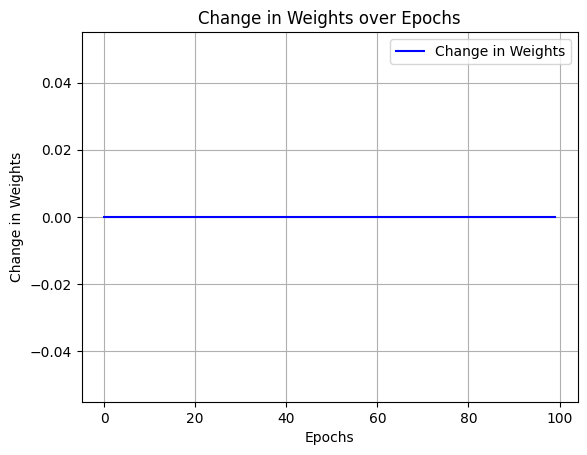

Graph: Change in Weights vs. Epochs


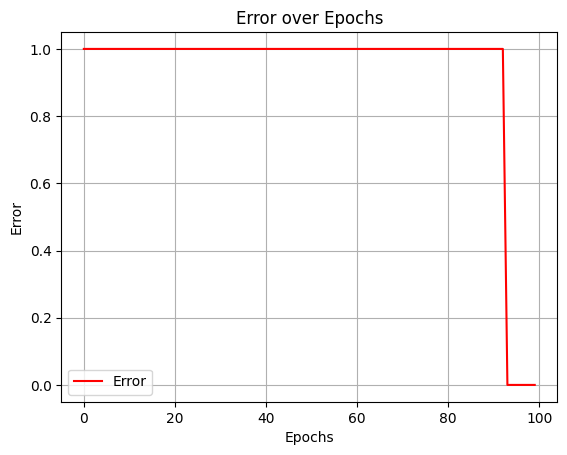

Graph: Error vs. Epochs


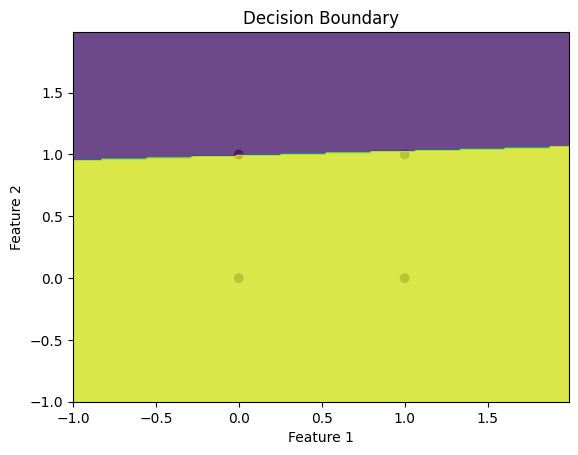

Graph: Decision Boundary


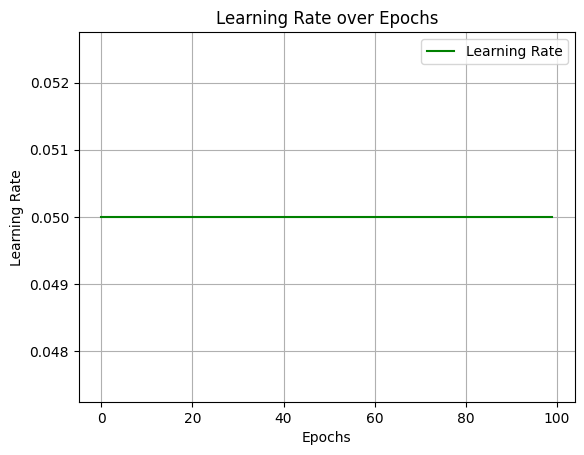

Graph: Learning Rate vs. Epochs


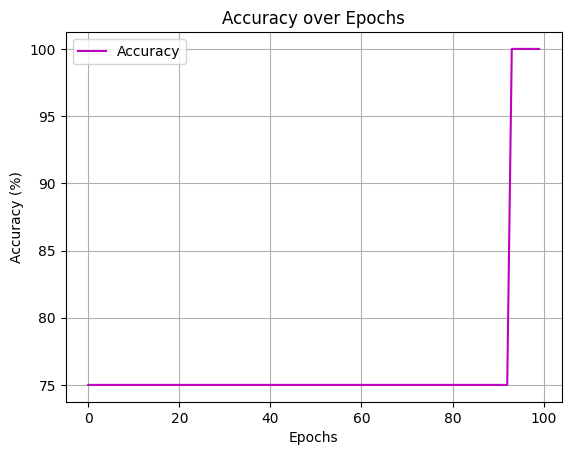

Graph: Accuracy vs. Epochs


In [ ]:
"""Same question"""

#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------

#I have put [0,0] as 1 and [1,1] as 1 here (since not mentioned). Trying the other posibility (3/4)
#Repeating A1

"""A1. Develop the above perceptron in your own code (don’t use the perceptron model available from package). Use the initial weights as provided below.
W0 = 10, W1 = 0.2, w2 = -0.75, learning rate (α) = 0.05
Use Step activation function to learn the weights of the network to implement above provided AND gate logic.
The activation function is demonstrated below."""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define XOR dataset and target outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([1, 0, 1, 1]) #I have put [0,0] as 0 and [1,1] as 1 here.

# Initialize weights and bias
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Define the step activation function
def step_activation(z):
    return np.where(z >= 0, 1, 0)

# Lists to store changes in weights and epochs
weight_changes = []
epochs_list = []

# Lists to store error and accuracy for plotting
error_list = []
accuracy_list = []

# Training the perceptron for XOR logic
epochs = 100
for epoch in range(epochs):
    error = 0
    correct_predictions = 0
    for i in range(len(X)):
        # Forward pass
        input_layer = X[i]
        z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
        output = step_activation(z1)  # Apply step activation function

        # Compute the error
        delta = y[i] - output
        error += delta ** 2

        # Update weights
        W0 += learning_rate * delta
        W1 += learning_rate * delta * input_layer[0]
        W2 += learning_rate * delta * input_layer[1]

        # Count correct predictions
        if y[i] == output:
            correct_predictions += 1

    # Append the weight change and epoch number
    weight_changes.append(abs(learning_rate * delta))
    epochs_list.append(epoch)

    # Calculate accuracy and append to list
    accuracy = correct_predictions / len(X)
    accuracy_list.append(accuracy)

    # Append error for this epoch
    error_list.append(error)

    # Print the error and accuracy for this epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Error = {error}, Accuracy = {accuracy * 100}%")

# Test the perceptron
print("Final weights:")
print(f"W0 = {W0}, W1 = {W1}, W2 = {W2}")

print("Testing the perceptron on XOR logic:")
for i in range(len(X)):
    input_layer = X[i]
    z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
    output = step_activation(z1)  # Apply step activation function
    print(f"Input: {input_layer}, Predicted Output: {output}")

# Plotting the graphs
plot_weight_changes(epochs_list, weight_changes)
plot_error(epochs_list, error_list)
plot_decision_boundary(X, y, W0, W1, W2)
plot_learning_rate(epochs_list, learning_rate)
plot_accuracy(epochs_list, accuracy_list)



Epoch 0: Error = 3, Accuracy = 25.0%
Epoch 10: Error = 3, Accuracy = 25.0%
Epoch 20: Error = 3, Accuracy = 25.0%
Epoch 30: Error = 3, Accuracy = 25.0%
Epoch 40: Error = 2, Accuracy = 50.0%
Epoch 50: Error = 1, Accuracy = 75.0%
Epoch 60: Error = 1, Accuracy = 75.0%
Epoch 70: Error = 1, Accuracy = 75.0%
Epoch 80: Error = 1, Accuracy = 75.0%
Epoch 90: Error = 1, Accuracy = 75.0%
Final weights:
W0 = 1.399999999999993, W1 = -1.3500000000000005, W2 = -4.3499999999999925
Testing the perceptron on XOR logic:
Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: 0
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 0


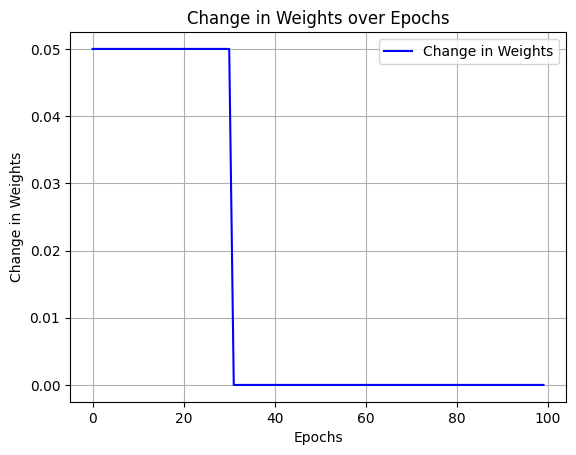

Graph: Change in Weights vs. Epochs


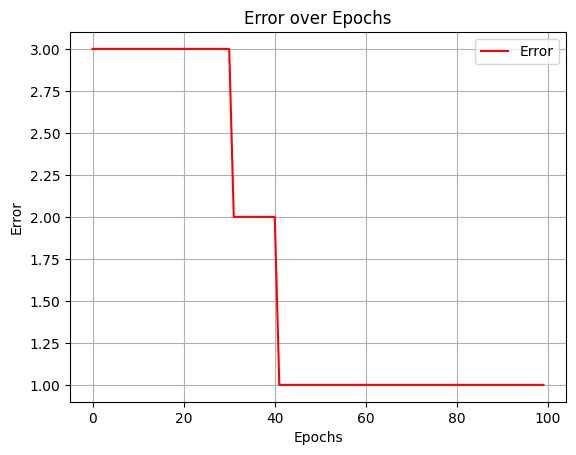

Graph: Error vs. Epochs


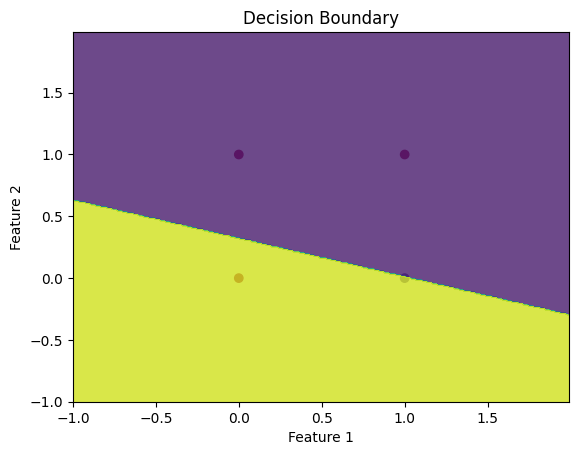

Graph: Decision Boundary


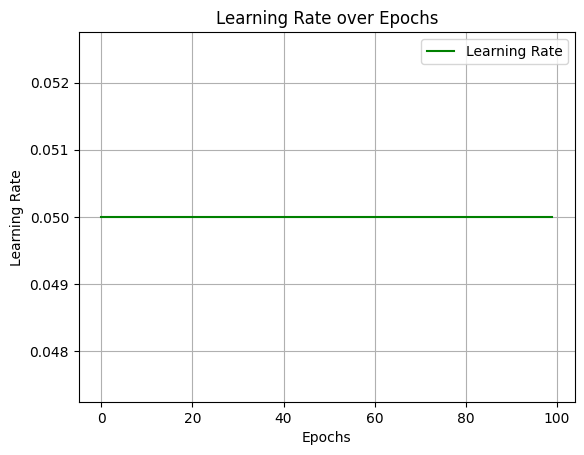

Graph: Learning Rate vs. Epochs


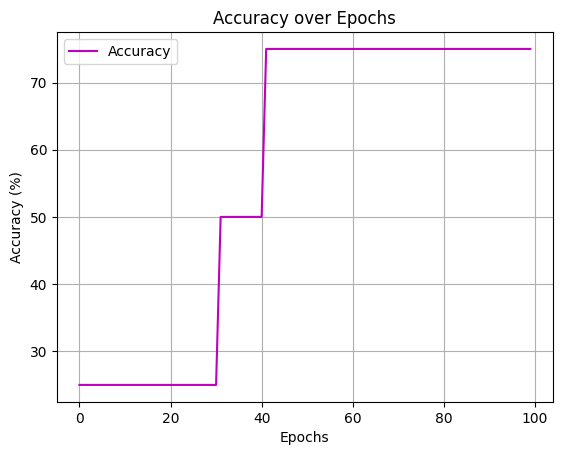

Graph: Accuracy vs. Epochs


In [ ]:
"""Same question"""

#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------

#I have put [0,0] as 0 and [1,1] as 0 here (since not mentioned). Trying the other posibility (4/4)
#Repeating A1

"""A1. Develop the above perceptron in your own code (don’t use the perceptron model available from package). Use the initial weights as provided below.
W0 = 10, W1 = 0.2, w2 = -0.75, learning rate (α) = 0.05
Use Step activation function to learn the weights of the network to implement above provided AND gate logic.
The activation function is demonstrated below."""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define XOR dataset and target outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 1, 0]) #I have put [0,0] as 0 and [1,1] as 1 here.

# Initialize weights and bias
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Define the step activation function
def step_activation(z):
    return np.where(z >= 0, 1, 0)

# Lists to store changes in weights and epochs
weight_changes = []
epochs_list = []

# Lists to store error and accuracy for plotting
error_list = []
accuracy_list = []

# Training the perceptron for XOR logic
epochs = 100
for epoch in range(epochs):
    error = 0
    correct_predictions = 0
    for i in range(len(X)):
        # Forward pass
        input_layer = X[i]
        z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
        output = step_activation(z1)  # Apply step activation function

        # Compute the error
        delta = y[i] - output
        error += delta ** 2

        # Update weights
        W0 += learning_rate * delta
        W1 += learning_rate * delta * input_layer[0]
        W2 += learning_rate * delta * input_layer[1]

        # Count correct predictions
        if y[i] == output:
            correct_predictions += 1

    # Append the weight change and epoch number
    weight_changes.append(abs(learning_rate * delta))
    epochs_list.append(epoch)

    # Calculate accuracy and append to list
    accuracy = correct_predictions / len(X)
    accuracy_list.append(accuracy)

    # Append error for this epoch
    error_list.append(error)

    # Print the error and accuracy for this epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Error = {error}, Accuracy = {accuracy * 100}%")

# Test the perceptron
print("Final weights:")
print(f"W0 = {W0}, W1 = {W1}, W2 = {W2}")

print("Testing the perceptron on XOR logic:")
for i in range(len(X)):
    input_layer = X[i]
    z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
    output = step_activation(z1)  # Apply step activation function
    print(f"Input: {input_layer}, Predicted Output: {output}")

# Plotting the graphs
plot_weight_changes(epochs_list, weight_changes)
plot_error(epochs_list, error_list)
plot_decision_boundary(X, y, W0, W1, W2)
plot_learning_rate(epochs_list, learning_rate)
plot_accuracy(epochs_list, accuracy_list)



In [ ]:
#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------

# Define the Bipolar Step activation function
def bipolar_step_activation(z):
    return np.where(z >= 0, 1, -1)

Epoch 0: Error = 2, Accuracy = 50.0%
Epoch 10: Error = 2, Accuracy = 50.0%
Epoch 20: Error = 2, Accuracy = 50.0%
Epoch 30: Error = 2, Accuracy = 50.0%
Epoch 40: Error = 2, Accuracy = 50.0%
Epoch 50: Error = 2, Accuracy = 50.0%
Epoch 60: Error = 2, Accuracy = 50.0%
Epoch 70: Error = 2, Accuracy = 50.0%
Epoch 80: Error = 2, Accuracy = 50.0%
Epoch 90: Error = 2, Accuracy = 50.0%
Final weights:
W0 = 2.8999999999999906, W1 = 0.2, W2 = -2.849999999999998
Testing the perceptron on XOR logic:
Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 1


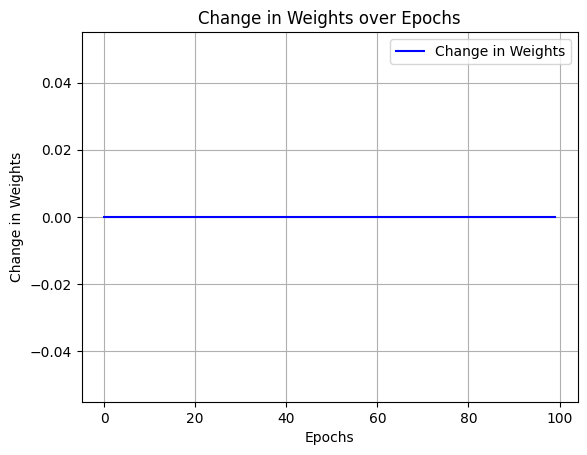

Graph: Change in Weights vs. Epochs


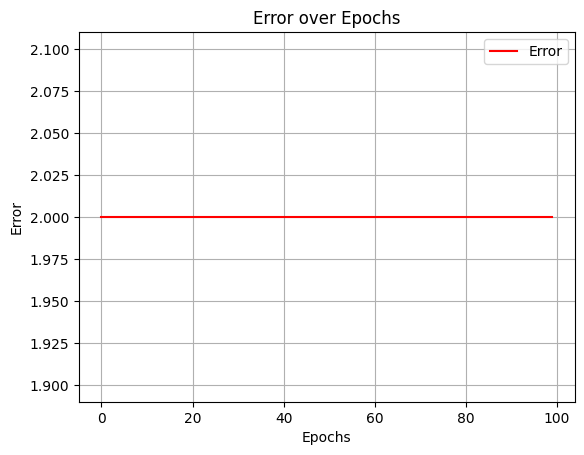

Graph: Error vs. Epochs


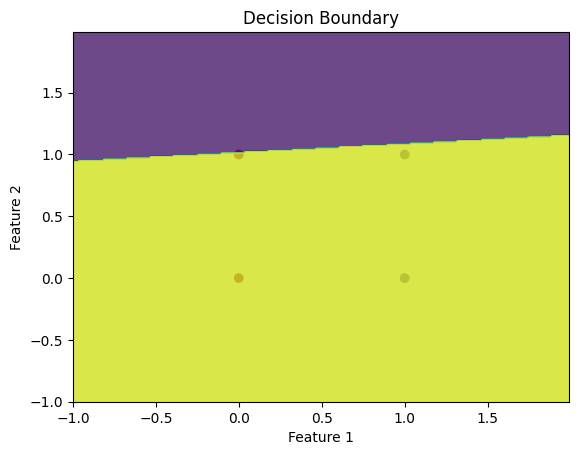

Graph: Decision Boundary


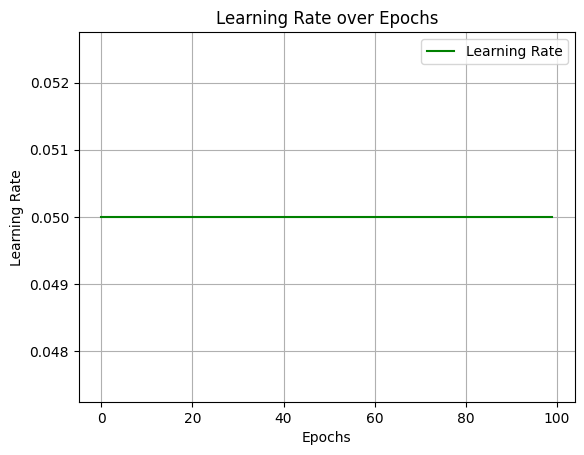

Graph: Learning Rate vs. Epochs


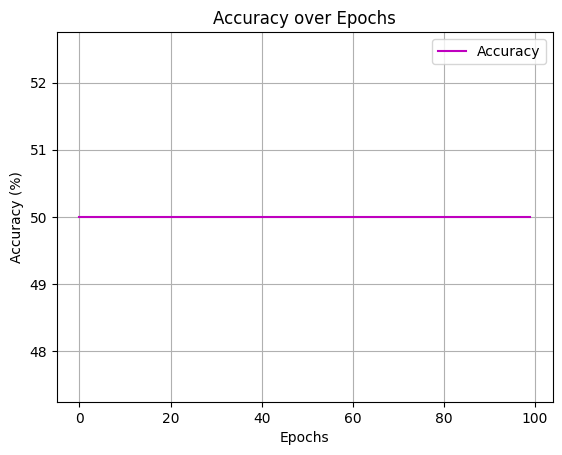

Graph: Accuracy vs. Epochs


In [ ]:
"""A9. Repeat exercise A1 & A2 with 2 output nodes (as shown below). A zero output of logic gate maps
to [O1 O2] = [1 0] from output layer while a one output from logic gate maps to [0 1]."""

#Repeating A2
#Using the Bi-Polar Step Function

#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------

#I have put [0,0] as 0 and [1,1] as 1 here (since not mentioned). Trying the other posibility (1/4)
#Repeating A2

"""A2. Repeat the above A1 experiment with following activation functions. Compare the iterations
taken to converge against each of the activation functions. Keep the learning rate same as A1.
• Bi-Polar Step function
• Sigmoid function
• ReLU function"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define XOR dataset and target outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 1, 1]) # I have put [0,0] as 0 and [1,1] as 1 here.

# Initialize weights and bias
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Lists to store changes in weights and epochs
weight_changes = []
epochs_list = []

# Lists to store error and accuracy for plotting
error_list = []
accuracy_list = []

# Training the perceptron for XOR logic
epochs = 100
for epoch in range(epochs):
    error = 0
    correct_predictions = 0
    for i in range(len(X)):
        # Forward pass
        input_layer = X[i]
        z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
        output = bipolar_step_activation(z1)  # Apply bipolar step activation function

        # Compute the error
        delta = y[i] - output
        error += delta ** 2

        # Update weights
        W0 += learning_rate * delta
        W1 += learning_rate * delta * input_layer[0]
        W2 += learning_rate * delta * input_layer[1]

        # Count correct predictions
        if y[i] == output:
            correct_predictions += 1

    # Append the weight change and epoch number
    weight_changes.append(abs(learning_rate * delta))
    epochs_list.append(epoch)

    # Calculate accuracy and append to list
    accuracy = correct_predictions / len(X)
    accuracy_list.append(accuracy)

    # Append error for this epoch
    error_list.append(error)

    # Print the error and accuracy for this epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Error = {error}, Accuracy = {accuracy * 100}%")

# Test the perceptron
print("Final weights:")
print(f"W0 = {W0}, W1 = {W1}, W2 = {W2}")

print("Testing the perceptron on XOR logic:")
for i in range(len(X)):
    input_layer = X[i]
    z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
    output = bipolar_step_activation(z1)  # Apply bipolar step activation function
    print(f"Input: {input_layer}, Predicted Output: {output}")

# Plotting the graphs
plot_weight_changes(epochs_list, weight_changes)
plot_error(epochs_list, error_list)
plot_decision_boundary(X, y, W0, W1, W2)
plot_learning_rate(epochs_list, learning_rate)
plot_accuracy(epochs_list, accuracy_list)


Epoch 0: Error = 2, Accuracy = 50.0%
Epoch 10: Error = 2, Accuracy = 50.0%
Epoch 20: Error = 2, Accuracy = 50.0%
Epoch 30: Error = 2, Accuracy = 50.0%
Epoch 40: Error = 2, Accuracy = 50.0%
Epoch 50: Error = 2, Accuracy = 50.0%
Epoch 60: Error = 2, Accuracy = 50.0%
Epoch 70: Error = 2, Accuracy = 50.0%
Epoch 80: Error = 2, Accuracy = 50.0%
Epoch 90: Error = 2, Accuracy = 50.0%
Final weights:
W0 = 5.399999999999982, W1 = 0.1000000000000001, W2 = -5.349999999999989
Testing the perceptron on XOR logic:
Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 1


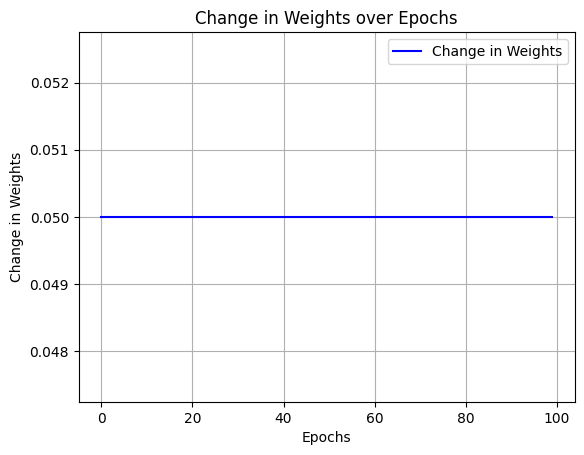

Graph: Change in Weights vs. Epochs


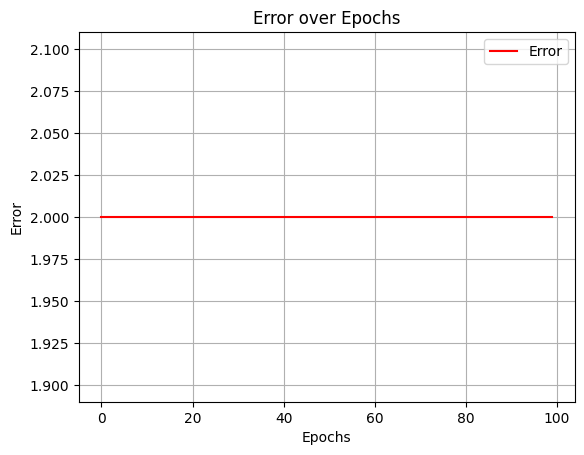

Graph: Error vs. Epochs


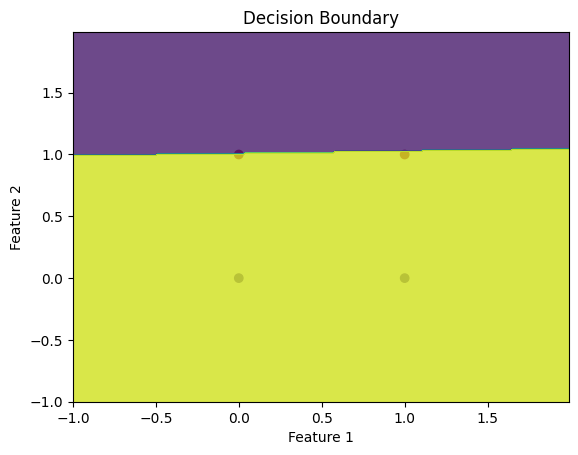

Graph: Decision Boundary


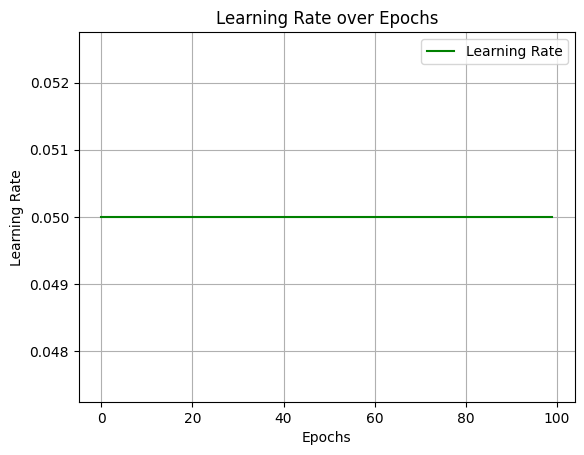

Graph: Learning Rate vs. Epochs


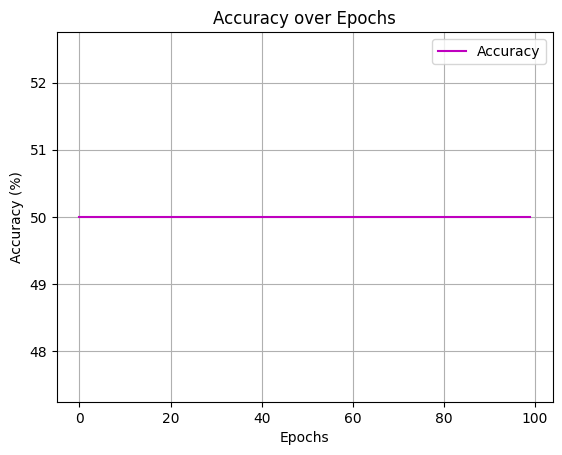

Graph: Accuracy vs. Epochs


In [ ]:
"""A9. Repeat exercise A1 & A2 with 2 output nodes (as shown below). A zero output of logic gate maps
to [O1 O2] = [1 0] from output layer while a one output from logic gate maps to [0 1]."""

#Repeating A2
#Using the Bi-Polar Step Function

#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------

#I have put [0,0] as 1 and [1,1] as 0 here (since not mentioned). Trying the other posibility (2/4)
#Repeating A2

"""A2. Repeat the above A1 experiment with following activation functions. Compare the iterations
taken to converge against each of the activation functions. Keep the learning rate same as A1.
• Bi-Polar Step function
• Sigmoid function
• ReLU function"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define XOR dataset and target outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([1, 0, 1, 0]) # I have put [0,0] as 0 and [1,1] as 1 here.

# Initialize weights and bias
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Lists to store changes in weights and epochs
weight_changes = []
epochs_list = []

# Lists to store error and accuracy for plotting
error_list = []
accuracy_list = []

# Training the perceptron for XOR logic
epochs = 100
for epoch in range(epochs):
    error = 0
    correct_predictions = 0
    for i in range(len(X)):
        # Forward pass
        input_layer = X[i]
        z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
        output = bipolar_step_activation(z1)  # Apply bipolar step activation function

        # Compute the error
        delta = y[i] - output
        error += delta ** 2

        # Update weights
        W0 += learning_rate * delta
        W1 += learning_rate * delta * input_layer[0]
        W2 += learning_rate * delta * input_layer[1]

        # Count correct predictions
        if y[i] == output:
            correct_predictions += 1

    # Append the weight change and epoch number
    weight_changes.append(abs(learning_rate * delta))
    epochs_list.append(epoch)

    # Calculate accuracy and append to list
    accuracy = correct_predictions / len(X)
    accuracy_list.append(accuracy)

    # Append error for this epoch
    error_list.append(error)

    # Print the error and accuracy for this epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Error = {error}, Accuracy = {accuracy * 100}%")

# Test the perceptron
print("Final weights:")
print(f"W0 = {W0}, W1 = {W1}, W2 = {W2}")

print("Testing the perceptron on XOR logic:")
for i in range(len(X)):
    input_layer = X[i]
    z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
    output = bipolar_step_activation(z1)  # Apply bipolar step activation function
    print(f"Input: {input_layer}, Predicted Output: {output}")

# Plotting the graphs
plot_weight_changes(epochs_list, weight_changes)
plot_error(epochs_list, error_list)
plot_decision_boundary(X, y, W0, W1, W2)
plot_learning_rate(epochs_list, learning_rate)
plot_accuracy(epochs_list, accuracy_list)

Epoch 0: Error = 3, Accuracy = 25.0%
Epoch 10: Error = 3, Accuracy = 25.0%
Epoch 20: Error = 3, Accuracy = 25.0%
Epoch 30: Error = 3, Accuracy = 25.0%
Epoch 40: Error = 3, Accuracy = 25.0%
Epoch 50: Error = 3, Accuracy = 25.0%
Epoch 60: Error = 3, Accuracy = 25.0%
Epoch 70: Error = 3, Accuracy = 25.0%
Epoch 80: Error = 3, Accuracy = 25.0%
Epoch 90: Error = 3, Accuracy = 25.0%
Final weights:
W0 = 2.8999999999999906, W1 = 0.1000000000000001, W2 = -2.849999999999998
Testing the perceptron on XOR logic:
Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 1


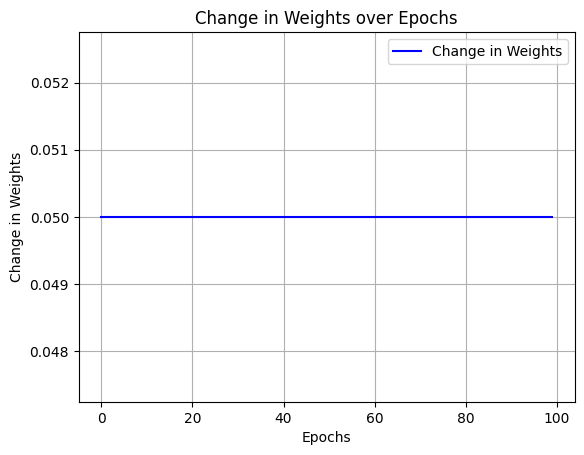

Graph: Change in Weights vs. Epochs


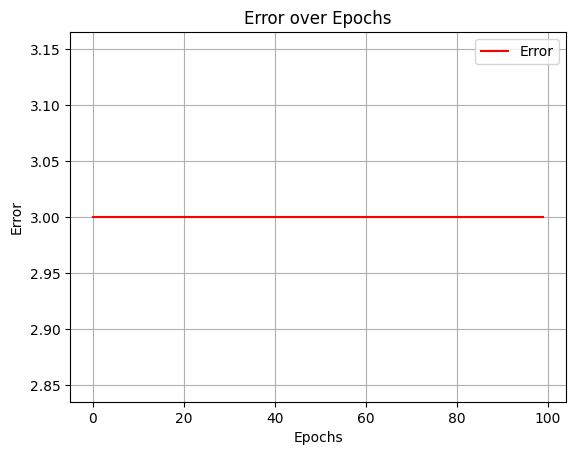

Graph: Error vs. Epochs


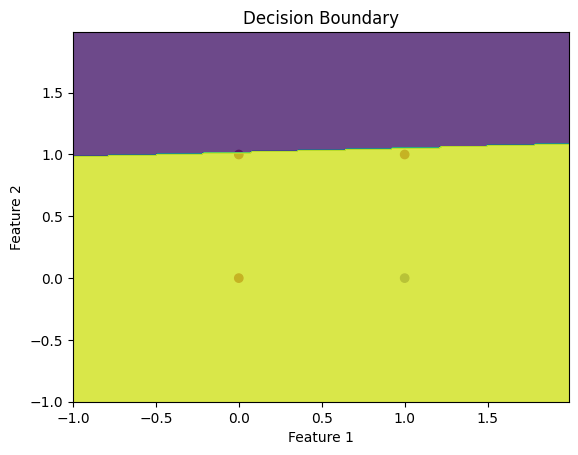

Graph: Decision Boundary


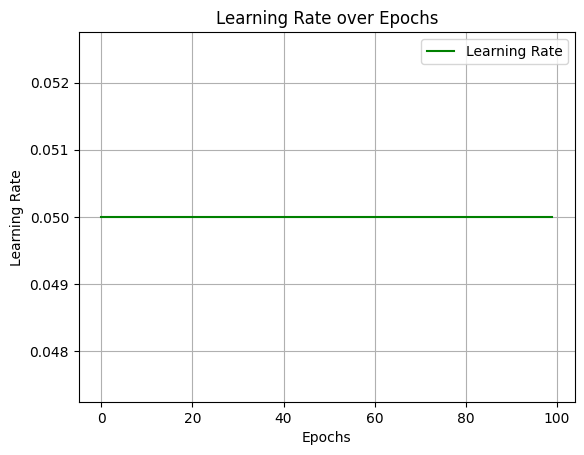

Graph: Learning Rate vs. Epochs


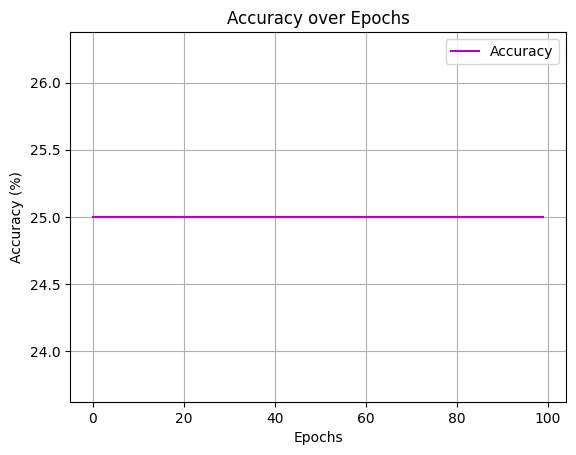

Graph: Accuracy vs. Epochs


In [ ]:
"""A9. Repeat exercise A1 & A2 with 2 output nodes (as shown below). A zero output of logic gate maps
to [O1 O2] = [1 0] from output layer while a one output from logic gate maps to [0 1]."""

#Repeating A2
#Using the Bi-Polar Step Function

#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------

#I have put [0,0] as 0 and [1,1] as 0 here (since not mentioned). Trying the other posibility (3/4)
#Repeating A2

"""A2. Repeat the above A1 experiment with following activation functions. Compare the iterations
taken to converge against each of the activation functions. Keep the learning rate same as A1.
• Bi-Polar Step function
• Sigmoid function
• ReLU function"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define XOR dataset and target outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 1, 0]) # I have put [0,0] as 0 and [1,1] as 1 here.

# Initialize weights and bias
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Lists to store changes in weights and epochs
weight_changes = []
epochs_list = []

# Lists to store error and accuracy for plotting
error_list = []
accuracy_list = []

# Training the perceptron for XOR logic
epochs = 100
for epoch in range(epochs):
    error = 0
    correct_predictions = 0
    for i in range(len(X)):
        # Forward pass
        input_layer = X[i]
        z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
        output = bipolar_step_activation(z1)  # Apply bipolar step activation function

        # Compute the error
        delta = y[i] - output
        error += delta ** 2

        # Update weights
        W0 += learning_rate * delta
        W1 += learning_rate * delta * input_layer[0]
        W2 += learning_rate * delta * input_layer[1]

        # Count correct predictions
        if y[i] == output:
            correct_predictions += 1

    # Append the weight change and epoch number
    weight_changes.append(abs(learning_rate * delta))
    epochs_list.append(epoch)

    # Calculate accuracy and append to list
    accuracy = correct_predictions / len(X)
    accuracy_list.append(accuracy)

    # Append error for this epoch
    error_list.append(error)

    # Print the error and accuracy for this epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Error = {error}, Accuracy = {accuracy * 100}%")

# Test the perceptron
print("Final weights:")
print(f"W0 = {W0}, W1 = {W1}, W2 = {W2}")

print("Testing the perceptron on XOR logic:")
for i in range(len(X)):
    input_layer = X[i]
    z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
    output = bipolar_step_activation(z1)  # Apply bipolar step activation function
    print(f"Input: {input_layer}, Predicted Output: {output}")

# Plotting the graphs
plot_weight_changes(epochs_list, weight_changes)
plot_error(epochs_list, error_list)
plot_decision_boundary(X, y, W0, W1, W2)
plot_learning_rate(epochs_list, learning_rate)
plot_accuracy(epochs_list, accuracy_list)

Epoch 0: Error = 1, Accuracy = 75.0%
Epoch 10: Error = 1, Accuracy = 75.0%
Epoch 20: Error = 1, Accuracy = 75.0%
Epoch 30: Error = 1, Accuracy = 75.0%
Epoch 40: Error = 1, Accuracy = 75.0%
Epoch 50: Error = 1, Accuracy = 75.0%
Epoch 60: Error = 1, Accuracy = 75.0%
Epoch 70: Error = 1, Accuracy = 75.0%
Epoch 80: Error = 1, Accuracy = 75.0%
Epoch 90: Error = 1, Accuracy = 75.0%
Final weights:
W0 = 5.399999999999982, W1 = 0.2, W2 = -5.349999999999989
Testing the perceptron on XOR logic:
Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 1


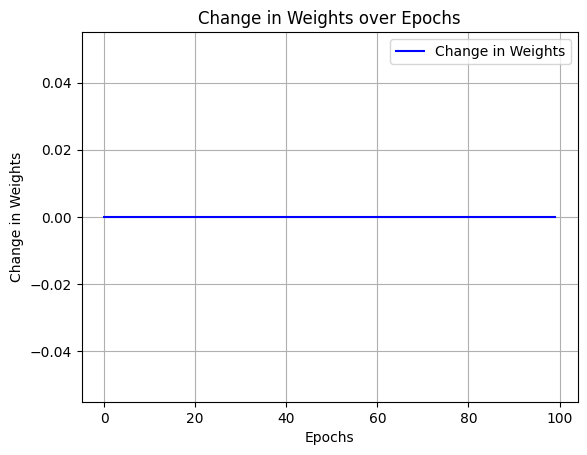

Graph: Change in Weights vs. Epochs


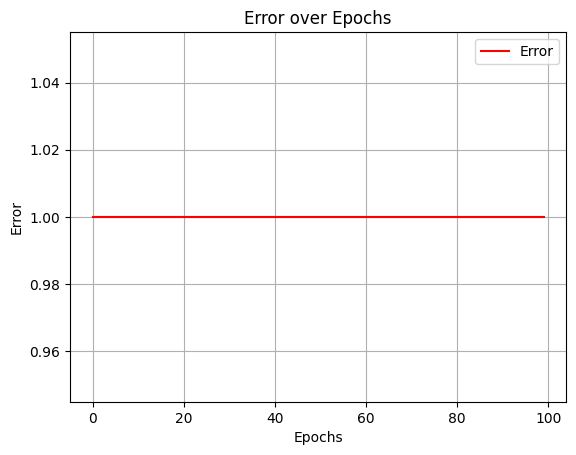

Graph: Error vs. Epochs


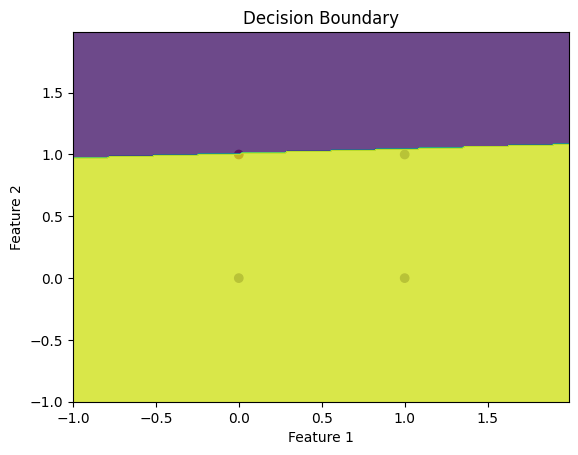

Graph: Decision Boundary


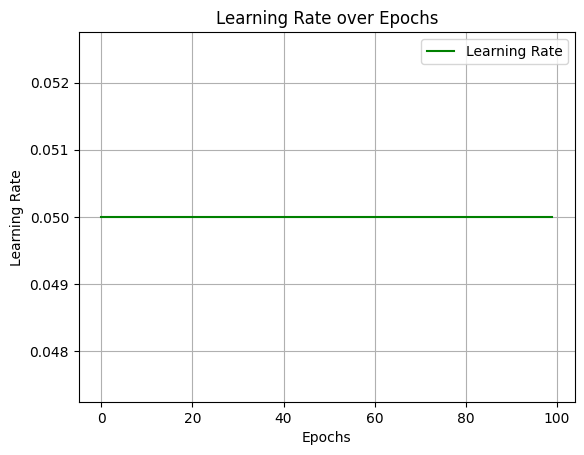

Graph: Learning Rate vs. Epochs


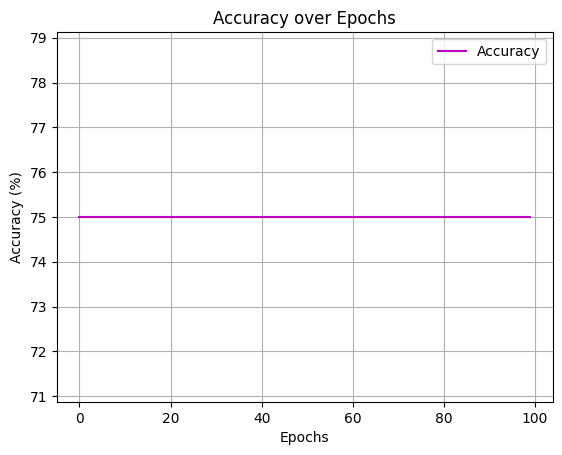

Graph: Accuracy vs. Epochs


In [ ]:
"""A9. Repeat exercise A1 & A2 with 2 output nodes (as shown below). A zero output of logic gate maps
to [O1 O2] = [1 0] from output layer while a one output from logic gate maps to [0 1]."""

#Repeating A2
#Using the Bi-Polar Step Function

#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------

#I have put [0,0] as 1 and [1,1] as 1 here (since not mentioned). Trying the other posibility (4/4)
#Repeating A2

"""A2. Repeat the above A1 experiment with following activation functions. Compare the iterations
taken to converge against each of the activation functions. Keep the learning rate same as A1.
• Bi-Polar Step function
• Sigmoid function
• ReLU function"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define XOR dataset and target outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([1, 0, 1, 1]) # I have put [0,0] as 0 and [1,1] as 1 here.

# Initialize weights and bias
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Lists to store changes in weights and epochs
weight_changes = []
epochs_list = []

# Lists to store error and accuracy for plotting
error_list = []
accuracy_list = []

# Training the perceptron for XOR logic
epochs = 100
for epoch in range(epochs):
    error = 0
    correct_predictions = 0
    for i in range(len(X)):
        # Forward pass
        input_layer = X[i]
        z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
        output = bipolar_step_activation(z1)  # Apply bipolar step activation function

        # Compute the error
        delta = y[i] - output
        error += delta ** 2

        # Update weights
        W0 += learning_rate * delta
        W1 += learning_rate * delta * input_layer[0]
        W2 += learning_rate * delta * input_layer[1]

        # Count correct predictions
        if y[i] == output:
            correct_predictions += 1

    # Append the weight change and epoch number
    weight_changes.append(abs(learning_rate * delta))
    epochs_list.append(epoch)

    # Calculate accuracy and append to list
    accuracy = correct_predictions / len(X)
    accuracy_list.append(accuracy)

    # Append error for this epoch
    error_list.append(error)

    # Print the error and accuracy for this epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Error = {error}, Accuracy = {accuracy * 100}%")

# Test the perceptron
print("Final weights:")
print(f"W0 = {W0}, W1 = {W1}, W2 = {W2}")

print("Testing the perceptron on XOR logic:")
for i in range(len(X)):
    input_layer = X[i]
    z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
    output = bipolar_step_activation(z1)  # Apply bipolar step activation function
    print(f"Input: {input_layer}, Predicted Output: {output}")

# Plotting the graphs
plot_weight_changes(epochs_list, weight_changes)
plot_error(epochs_list, error_list)
plot_decision_boundary(X, y, W0, W1, W2)
plot_learning_rate(epochs_list, learning_rate)
plot_accuracy(epochs_list, accuracy_list)

In [ ]:
#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------
# Define the sigmoid activation function
def sigmoid_activation(z):
    return 1 / (1 + np.exp(-z))

Epoch 0: Error = 1.9996339030219765, Accuracy = 50.0%
Epoch 10: Error = 1.9964687817473066, Accuracy = 50.0%
Epoch 20: Error = 1.9645918931849062, Accuracy = 50.0%
Epoch 30: Error = 1.697274310306971, Accuracy = 50.0%
Epoch 40: Error = 0.9547408682677754, Accuracy = 75.0%
Epoch 50: Error = 0.4621732464883124, Accuracy = 75.0%
Epoch 60: Error = 0.2350998150539609, Accuracy = 100.0%
Epoch 70: Error = 0.1313280127954101, Accuracy = 100.0%
Epoch 80: Error = 0.0815092371044724, Accuracy = 100.0%
Epoch 90: Error = 0.0554883975144797, Accuracy = 100.0%
Final weights:
W0 = 4.7182922939687835, W1 = -1.895801043481419, W2 = -6.1656409326174595
Testing the perceptron on XOR logic:
Input: [0 0], Predicted Output: 1.0
Input: [0 1], Predicted Output: 0.0
Input: [1 0], Predicted Output: 1.0
Input: [1 1], Predicted Output: 0.0


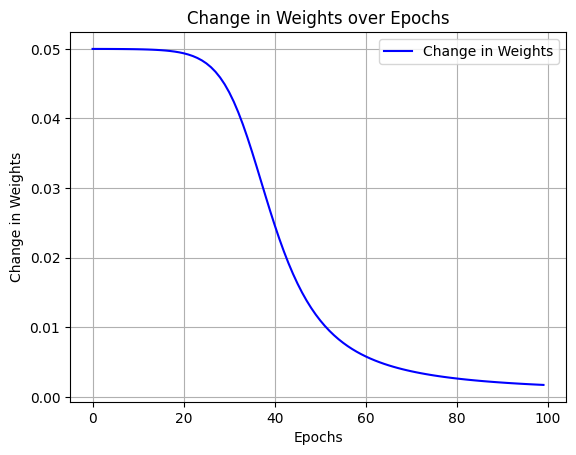

Graph: Change in Weights vs. Epochs


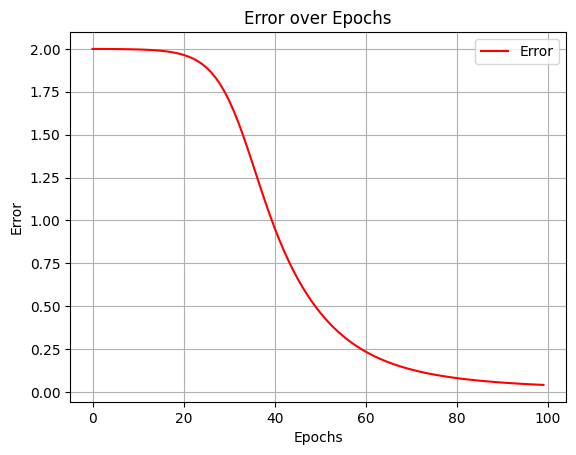

Graph: Error vs. Epochs


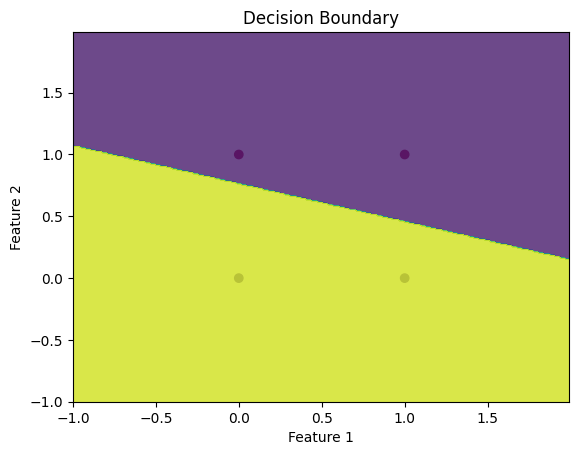

Graph: Decision Boundary


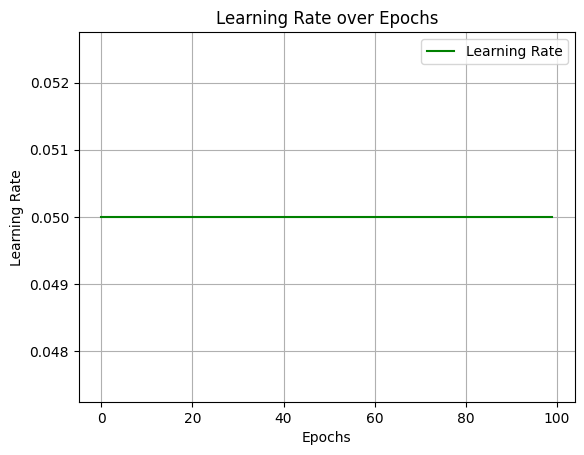

Graph: Learning Rate vs. Epochs


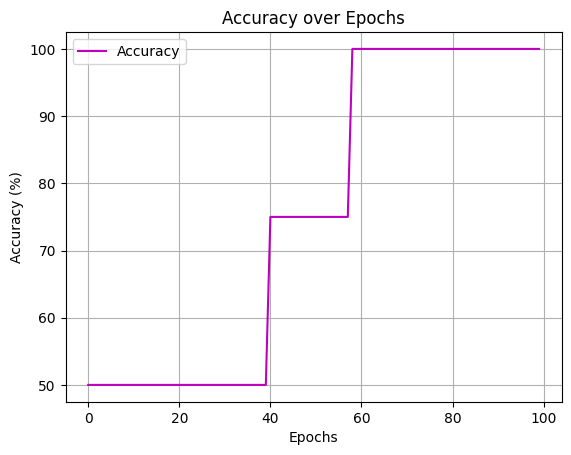

Graph: Accuracy vs. Epochs


In [ ]:
"""A9. Repeat exercise A1 & A2 with 2 output nodes (as shown below). A zero output of logic gate maps
to [O1 O2] = [1 0] from output layer while a one output from logic gate maps to [0 1]."""

#Repeating A2
#Using the Sigmoid Function

#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------

"""A2. Repeat the above A1 experiment with following activation functions. Compare the iterations
taken to converge against each of the activation functions. Keep the learning rate same as A1.
• Bi-Polar Step function
• Sigmoid function
• ReLU function"""

#I have put [0,0] as 1 and [1,1] as 0 here (since not mentioned). Trying the other posibility (1/4)
#Repeating A2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define XOR dataset and target outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([1, 0, 1, 0]) # I have put [0,0] as 0 and [1,1] as 1 here.

# Initialize weights and bias
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Lists to store changes in weights and epochs
weight_changes = []
epochs_list = []

# Lists to store error and accuracy for plotting
error_list = []
accuracy_list = []

# Training the perceptron for XOR logic
epochs = 100
for epoch in range(epochs):
    error = 0
    correct_predictions = 0
    for i in range(len(X)):
        # Forward pass
        input_layer = X[i]
        z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
        output = sigmoid_activation(z1)  # Apply sigmoid activation function

        # Compute the error
        delta = y[i] - output
        error += delta ** 2

        # Update weights
        W0 += learning_rate * delta
        W1 += learning_rate * delta * input_layer[0]
        W2 += learning_rate * delta * input_layer[1]

        # Count correct predictions
        if y[i] == np.round(output):
            correct_predictions += 1

    # Append the weight change and epoch number
    weight_changes.append(abs(learning_rate * delta))
    epochs_list.append(epoch)

    # Calculate accuracy and append to list
    accuracy = correct_predictions / len(X)
    accuracy_list.append(accuracy)

    # Append error for this epoch
    error_list.append(error)

    # Print the error and accuracy for this epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Error = {error}, Accuracy = {accuracy * 100}%")

# Test the perceptron
print("Final weights:")
print(f"W0 = {W0}, W1 = {W1}, W2 = {W2}")

print("Testing the perceptron on XOR logic:")
for i in range(len(X)):
    input_layer = X[i]
    z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
    output = sigmoid_activation(z1)  # Apply sigmoid activation function
    print(f"Input: {input_layer}, Predicted Output: {np.round(output)}")

# Plotting the graphs
plot_weight_changes(epochs_list, weight_changes)
plot_error(epochs_list, error_list)
plot_decision_boundary(X, y, W0, W1, W2)
plot_learning_rate(epochs_list, learning_rate)
plot_accuracy(epochs_list, accuracy_list)



Epoch 0: Error = 2.9995243399103177, Accuracy = 25.0%
Epoch 10: Error = 2.9934815696417196, Accuracy = 25.0%
Epoch 20: Error = 2.9009941086301385, Accuracy = 25.0%
Epoch 30: Error = 2.1679142939716054, Accuracy = 25.0%
Epoch 40: Error = 1.3505844187105758, Accuracy = 50.0%
Epoch 50: Error = 1.07044920502613, Accuracy = 75.0%
Epoch 60: Error = 0.9810177834234827, Accuracy = 75.0%
Epoch 70: Error = 0.9393536382964656, Accuracy = 75.0%
Epoch 80: Error = 0.9064569117072662, Accuracy = 75.0%
Epoch 90: Error = 0.8704732814681346, Accuracy = 75.0%
Final weights:
W0 = 1.6793738135403706, W1 = -0.9759390682891718, W2 = -4.905310958286087
Testing the perceptron on XOR logic:
Input: [0 0], Predicted Output: 1.0
Input: [0 1], Predicted Output: 0.0
Input: [1 0], Predicted Output: 1.0
Input: [1 1], Predicted Output: 0.0


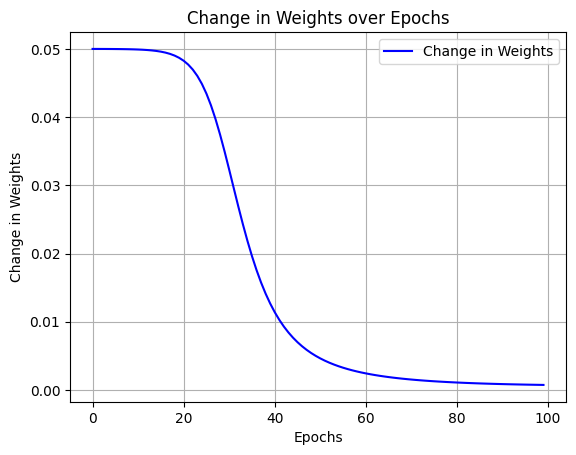

Graph: Change in Weights vs. Epochs


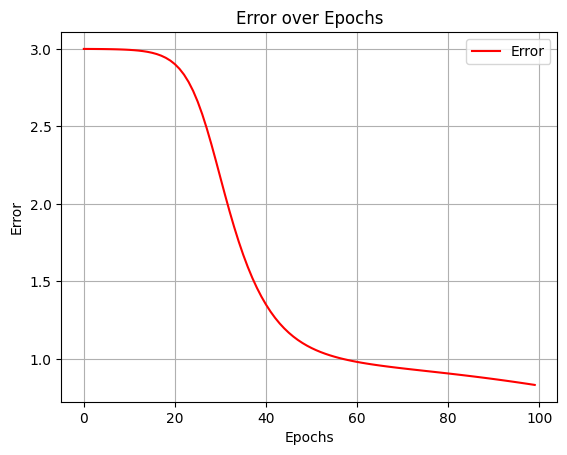

Graph: Error vs. Epochs


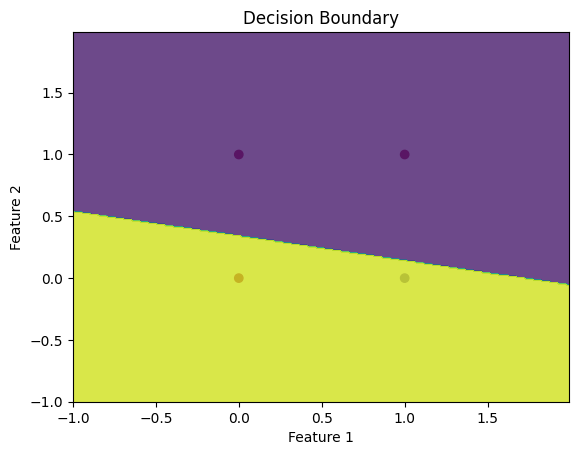

Graph: Decision Boundary


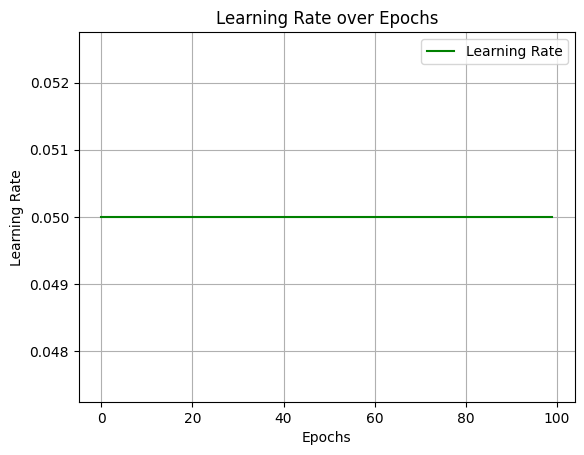

Graph: Learning Rate vs. Epochs


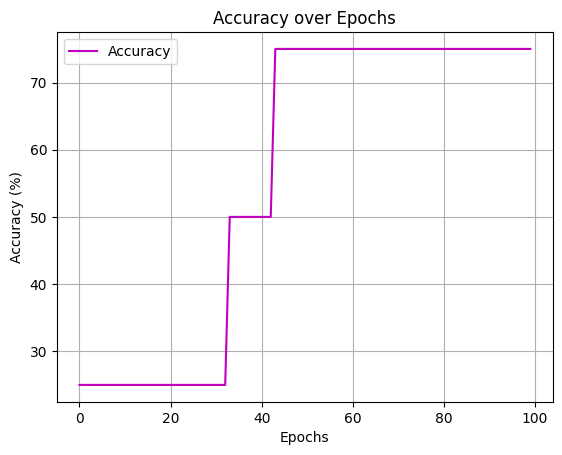

Graph: Accuracy vs. Epochs


In [ ]:
"""A9. Repeat exercise A1 & A2 with 2 output nodes (as shown below). A zero output of logic gate maps
to [O1 O2] = [1 0] from output layer while a one output from logic gate maps to [0 1]."""

#Repeating A2
#Using the Sigmoid Function

#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------

"""A2. Repeat the above A1 experiment with following activation functions. Compare the iterations
taken to converge against each of the activation functions. Keep the learning rate same as A1.
• Bi-Polar Step function
• Sigmoid function
• ReLU function"""

#I have put [0,0] as 0 and [1,1] as 0 here (since not mentioned). Trying the other posibility (3/4)
#Repeating A2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define XOR dataset and target outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 1, 0]) # I have put [0,0] as 0 and [1,1] as 1 here.

# Initialize weights and bias
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Lists to store changes in weights and epochs
weight_changes = []
epochs_list = []

# Lists to store error and accuracy for plotting
error_list = []
accuracy_list = []

# Training the perceptron for XOR logic
epochs = 100
for epoch in range(epochs):
    error = 0
    correct_predictions = 0
    for i in range(len(X)):
        # Forward pass
        input_layer = X[i]
        z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
        output = sigmoid_activation(z1)  # Apply sigmoid activation function

        # Compute the error
        delta = y[i] - output
        error += delta ** 2

        # Update weights
        W0 += learning_rate * delta
        W1 += learning_rate * delta * input_layer[0]
        W2 += learning_rate * delta * input_layer[1]

        # Count correct predictions
        if y[i] == np.round(output):
            correct_predictions += 1

    # Append the weight change and epoch number
    weight_changes.append(abs(learning_rate * delta))
    epochs_list.append(epoch)

    # Calculate accuracy and append to list
    accuracy = correct_predictions / len(X)
    accuracy_list.append(accuracy)

    # Append error for this epoch
    error_list.append(error)

    # Print the error and accuracy for this epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Error = {error}, Accuracy = {accuracy * 100}%")

# Test the perceptron
print("Final weights:")
print(f"W0 = {W0}, W1 = {W1}, W2 = {W2}")

print("Testing the perceptron on XOR logic:")
for i in range(len(X)):
    input_layer = X[i]
    z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
    output = sigmoid_activation(z1)  # Apply sigmoid activation function
    print(f"Input: {input_layer}, Predicted Output: {np.round(output)}")

# Plotting the graphs
plot_weight_changes(epochs_list, weight_changes)
plot_error(epochs_list, error_list)
plot_decision_boundary(X, y, W0, W1, W2)
plot_learning_rate(epochs_list, learning_rate)
plot_accuracy(epochs_list, accuracy_list)


Epoch 0: Error = 0.9998078159900714, Accuracy = 75.0%
Epoch 10: Error = 0.9994779390636751, Accuracy = 75.0%
Epoch 20: Error = 0.9985833831237007, Accuracy = 75.0%
Epoch 30: Error = 0.9961671565746331, Accuracy = 75.0%
Epoch 40: Error = 0.9897097165174925, Accuracy = 75.0%
Epoch 50: Error = 0.9729270817515238, Accuracy = 75.0%
Epoch 60: Error = 0.9322727243728287, Accuracy = 75.0%
Epoch 70: Error = 0.8483305921794028, Accuracy = 75.0%
Epoch 80: Error = 0.7191310075414661, Accuracy = 75.0%
Epoch 90: Error = 0.583694716718383, Accuracy = 75.0%
Final weights:
W0 = 5.663470811387652, W1 = 0.4971082809267168, W2 = -5.095231116268234
Testing the perceptron on XOR logic:
Input: [0 0], Predicted Output: 1.0
Input: [0 1], Predicted Output: 1.0
Input: [1 0], Predicted Output: 1.0
Input: [1 1], Predicted Output: 1.0


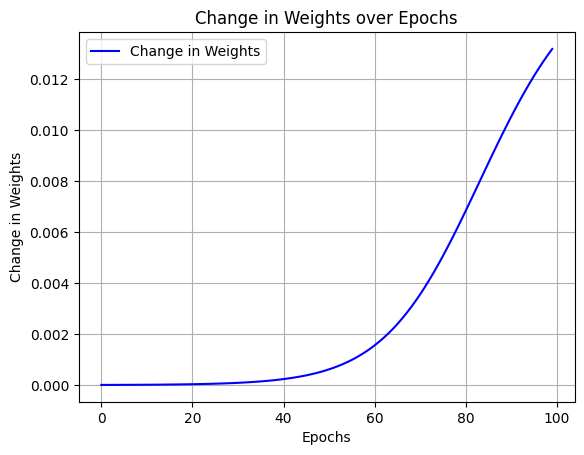

Graph: Change in Weights vs. Epochs


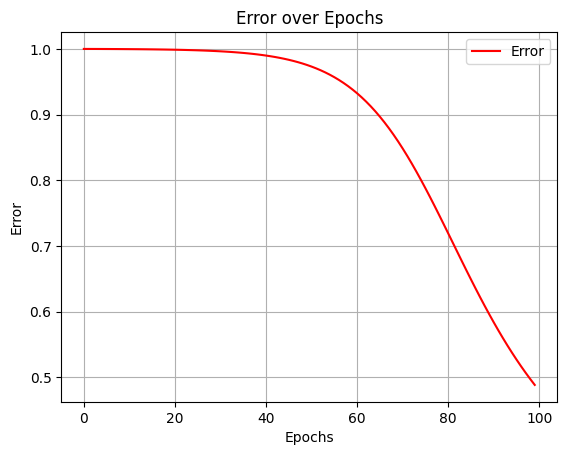

Graph: Error vs. Epochs


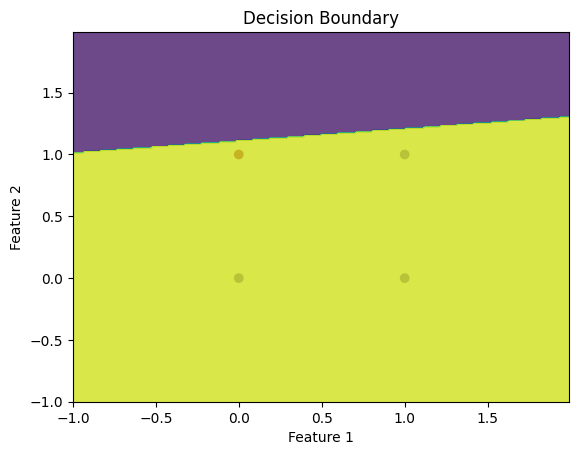

Graph: Decision Boundary


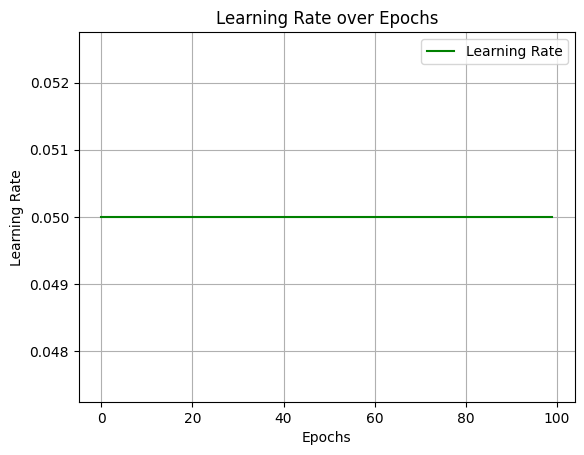

Graph: Learning Rate vs. Epochs


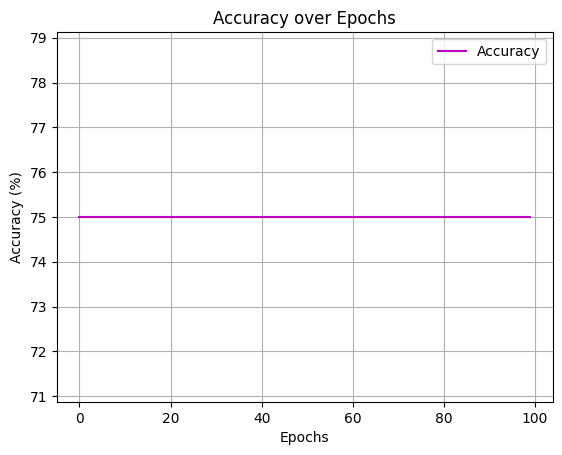

Graph: Accuracy vs. Epochs


In [ ]:
"""A9. Repeat exercise A1 & A2 with 2 output nodes (as shown below). A zero output of logic gate maps
to [O1 O2] = [1 0] from output layer while a one output from logic gate maps to [0 1]."""

#Repeating A2
#Using the Sigmoid Function

#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------

"""A2. Repeat the above A1 experiment with following activation functions. Compare the iterations
taken to converge against each of the activation functions. Keep the learning rate same as A1.
• Bi-Polar Step function
• Sigmoid function
• ReLU function"""

#I have put [0,0] as 1 and [1,1] as 1 here (since not mentioned). Trying the other posibility (4/4)
#Repeating A2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define XOR dataset and target outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([1, 0, 1, 1]) # I have put [0,0] as 0 and [1,1] as 1 here.

# Initialize weights and bias
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Lists to store changes in weights and epochs
weight_changes = []
epochs_list = []

# Lists to store error and accuracy for plotting
error_list = []
accuracy_list = []

# Training the perceptron for XOR logic
epochs = 100
for epoch in range(epochs):
    error = 0
    correct_predictions = 0
    for i in range(len(X)):
        # Forward pass
        input_layer = X[i]
        z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
        output = sigmoid_activation(z1)  # Apply sigmoid activation function

        # Compute the error
        delta = y[i] - output
        error += delta ** 2

        # Update weights
        W0 += learning_rate * delta
        W1 += learning_rate * delta * input_layer[0]
        W2 += learning_rate * delta * input_layer[1]

        # Count correct predictions
        if y[i] == np.round(output):
            correct_predictions += 1

    # Append the weight change and epoch number
    weight_changes.append(abs(learning_rate * delta))
    epochs_list.append(epoch)

    # Calculate accuracy and append to list
    accuracy = correct_predictions / len(X)
    accuracy_list.append(accuracy)

    # Append error for this epoch
    error_list.append(error)

    # Print the error and accuracy for this epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Error = {error}, Accuracy = {accuracy * 100}%")

# Test the perceptron
print("Final weights:")
print(f"W0 = {W0}, W1 = {W1}, W2 = {W2}")

print("Testing the perceptron on XOR logic:")
for i in range(len(X)):
    input_layer = X[i]
    z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
    output = sigmoid_activation(z1)  # Apply sigmoid activation function
    print(f"Input: {input_layer}, Predicted Output: {np.round(output)}")

# Plotting the graphs
plot_weight_changes(epochs_list, weight_changes)
plot_error(epochs_list, error_list)
plot_decision_boundary(X, y, W0, W1, W2)
plot_learning_rate(epochs_list, learning_rate)
plot_accuracy(epochs_list, accuracy_list)


Epoch 0: Error = 1.9997071686451549, Accuracy = 50.0%
Epoch 10: Error = 1.9988488785878114, Accuracy = 50.0%
Epoch 20: Error = 1.9952974847094263, Accuracy = 50.0%
Epoch 30: Error = 1.9805086749788345, Accuracy = 50.0%
Epoch 40: Error = 1.9229152367848252, Accuracy = 50.0%
Epoch 50: Error = 1.7552184080249298, Accuracy = 50.0%
Epoch 60: Error = 1.5111532384378878, Accuracy = 50.0%
Epoch 70: Error = 1.3531852749013769, Accuracy = 50.0%
Epoch 80: Error = 1.2700589450761341, Accuracy = 75.0%
Epoch 90: Error = 1.2031440169978502, Accuracy = 75.0%
Final weights:
W0 = 2.4239247036951057, W1 = 1.214904259585999, W2 = -3.4629585976851196
Testing the perceptron on XOR logic:
Input: [0 0], Predicted Output: 1.0
Input: [0 1], Predicted Output: 0.0
Input: [1 0], Predicted Output: 1.0
Input: [1 1], Predicted Output: 1.0


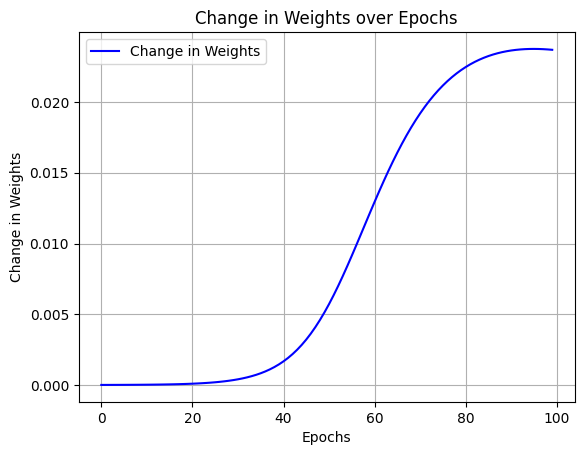

Graph: Change in Weights vs. Epochs


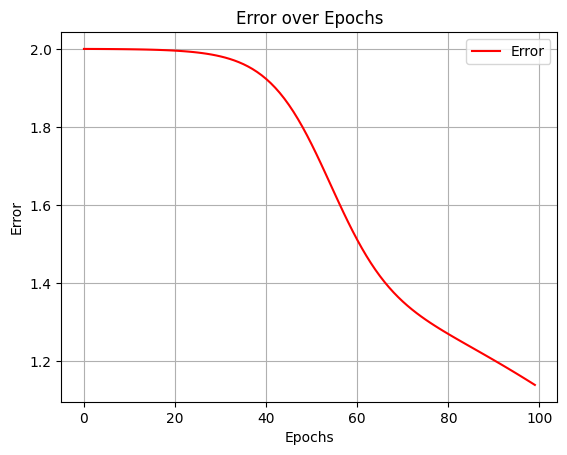

Graph: Error vs. Epochs


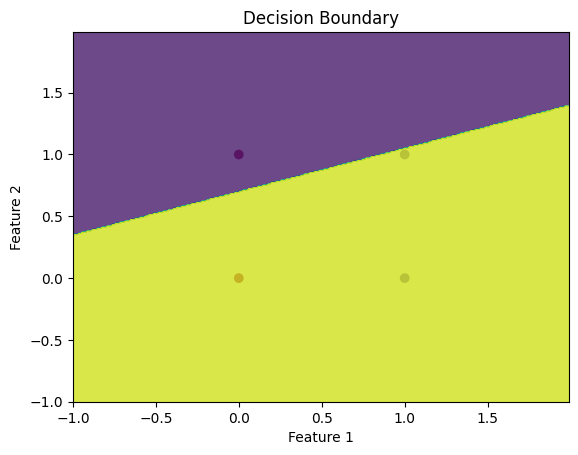

Graph: Decision Boundary


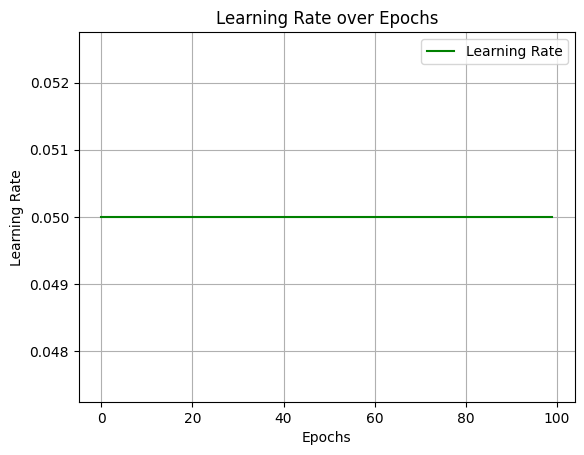

Graph: Learning Rate vs. Epochs


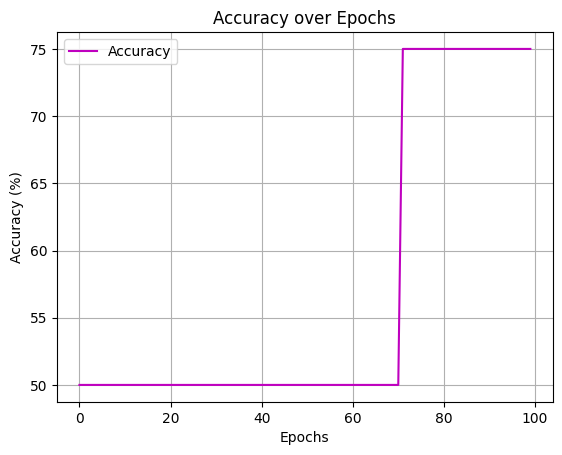

Graph: Accuracy vs. Epochs


In [ ]:
"""A9. Repeat exercise A1 & A2 with 2 output nodes (as shown below). A zero output of logic gate maps
to [O1 O2] = [1 0] from output layer while a one output from logic gate maps to [0 1]."""

#Repeating A2
#Using the Sigmoid Function

#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------

"""A2. Repeat the above A1 experiment with following activation functions. Compare the iterations
taken to converge against each of the activation functions. Keep the learning rate same as A1.
• Bi-Polar Step function
• Sigmoid function
• ReLU function"""

#I have put [0,0] as 0 and [1,1] as 1 here (since not mentioned). Trying the other posibility (2/4)
#Repeating A2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define XOR dataset and target outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 1, 1]) # I have put [0,0] as 0 and [1,1] as 1 here.

# Initialize weights and bias
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Lists to store changes in weights and epochs
weight_changes = []
epochs_list = []

# Lists to store error and accuracy for plotting
error_list = []
accuracy_list = []

# Training the perceptron for XOR logic
epochs = 100
for epoch in range(epochs):
    error = 0
    correct_predictions = 0
    for i in range(len(X)):
        # Forward pass
        input_layer = X[i]
        z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
        output = sigmoid_activation(z1)  # Apply sigmoid activation function

        # Compute the error
        delta = y[i] - output
        error += delta ** 2

        # Update weights
        W0 += learning_rate * delta
        W1 += learning_rate * delta * input_layer[0]
        W2 += learning_rate * delta * input_layer[1]

        # Count correct predictions
        if y[i] == np.round(output):
            correct_predictions += 1

    # Append the weight change and epoch number
    weight_changes.append(abs(learning_rate * delta))
    epochs_list.append(epoch)

    # Calculate accuracy and append to list
    accuracy = correct_predictions / len(X)
    accuracy_list.append(accuracy)

    # Append error for this epoch
    error_list.append(error)

    # Print the error and accuracy for this epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Error = {error}, Accuracy = {accuracy * 100}%")

# Test the perceptron
print("Final weights:")
print(f"W0 = {W0}, W1 = {W1}, W2 = {W2}")

print("Testing the perceptron on XOR logic:")
for i in range(len(X)):
    input_layer = X[i]
    z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
    output = sigmoid_activation(z1)  # Apply sigmoid activation function
    print(f"Input: {input_layer}, Predicted Output: {np.round(output)}")

# Plotting the graphs
plot_weight_changes(epochs_list, weight_changes)
plot_error(epochs_list, error_list)
plot_decision_boundary(X, y, W0, W1, W2)
plot_learning_rate(epochs_list, learning_rate)
plot_accuracy(epochs_list, accuracy_list)


Epoch 0: Error = 283.87828281249995, Accuracy = 0.0%
Epoch 10: Error = 13.91280494553977, Accuracy = 0.0%
Epoch 20: Error = 6.64610038557462, Accuracy = 50.0%
Epoch 30: Error = 4.410563365372994, Accuracy = 50.0%
Epoch 40: Error = 3.2201211012679845, Accuracy = 50.0%
Epoch 50: Error = 1.9784957964236207, Accuracy = 50.0%
Epoch 60: Error = 1.0296969724527132, Accuracy = 50.0%
Epoch 70: Error = 0.5349769338469492, Accuracy = 75.0%
Epoch 80: Error = 0.2779220761950694, Accuracy = 100.0%
Epoch 90: Error = 0.14438106695958883, Accuracy = 100.0%
Final weights:
W0 = 0.2243986190175811, W1 = 0.824792870511116, W2 = -0.18018281465325506
Testing the perceptron on XOR logic:
Input: [0 0], Predicted Output: 0.0
Input: [0 1], Predicted Output: 0.0
Input: [1 0], Predicted Output: 1.0
Input: [1 1], Predicted Output: 1.0


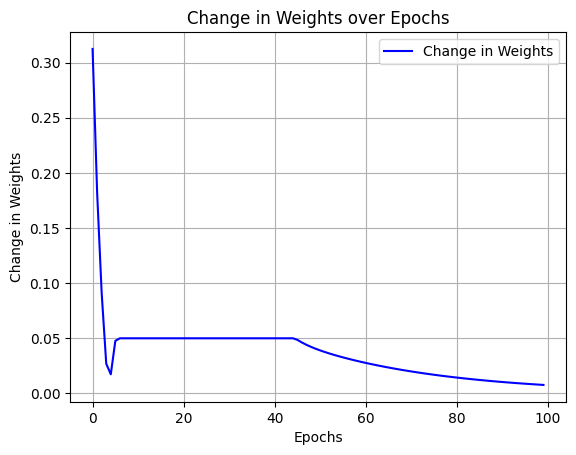

Graph: Change in Weights vs. Epochs


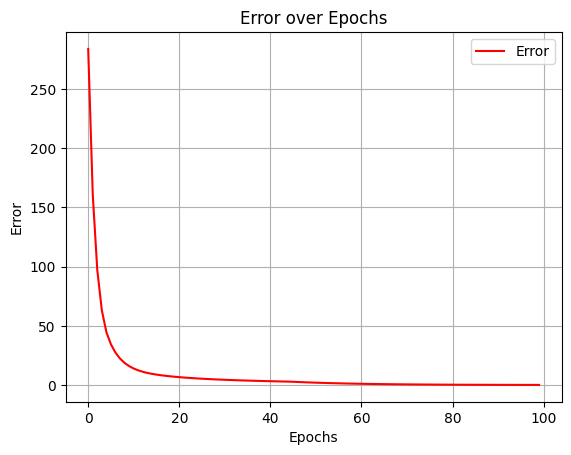

Graph: Error vs. Epochs


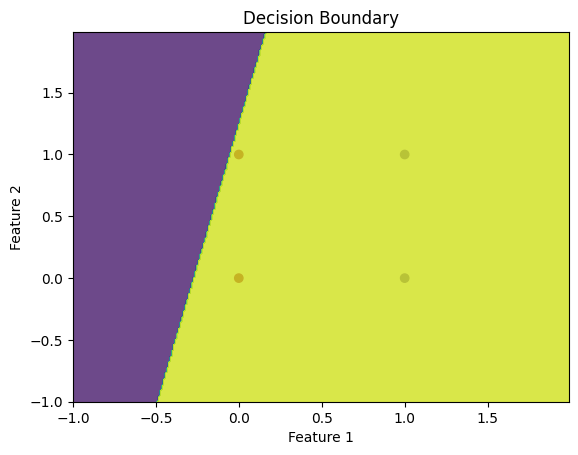

Graph: Decision Boundary


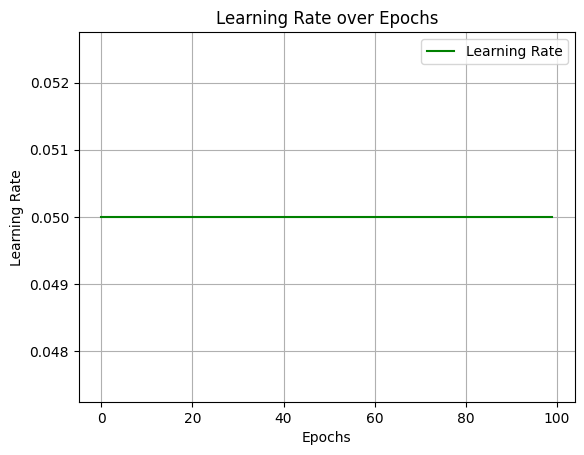

Graph: Learning Rate vs. Epochs


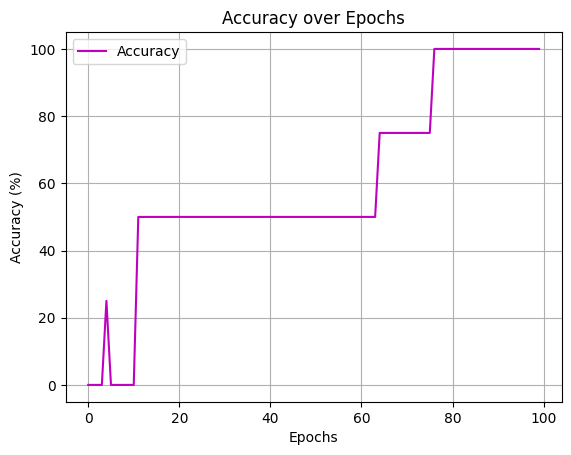

Graph: Accuracy vs. Epochs


In [ ]:
"""A9. Repeat exercise A1 & A2 with 2 output nodes (as shown below). A zero output of logic gate maps
to [O1 O2] = [1 0] from output layer while a one output from logic gate maps to [0 1]."""

#Repeating A2
#Using the ReLU Function

#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------

"""A2. Repeat the above A1 experiment with following activation functions. Compare the iterations
taken to converge against each of the activation functions. Keep the learning rate same as A1.
• Bi-Polar Step function
• Sigmoid function
• ReLU function"""

#I have put [0,0] as 0 and [1,1] as 1 here (since not mentioned). Trying the other posibility (1/4)
#Repeating A2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define XOR dataset and target outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 1, 1]) # I have put [0,0] as 0 and [1,1] as 1 here.

# Initialize weights and bias
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Define the ReLU activation function
def relu_activation(z):
    return np.maximum(0, z)

# Lists to store changes in weights and epochs
weight_changes = []
epochs_list = []

# Lists to store error and accuracy for plotting
error_list = []
accuracy_list = []

# Training the perceptron for XOR logic
epochs = 100
for epoch in range(epochs):
    error = 0
    correct_predictions = 0
    for i in range(len(X)):
        # Forward pass
        input_layer = X[i]
        z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
        output = relu_activation(z1)  # Apply ReLU activation function

        # Compute the error
        delta = y[i] - output
        error += delta ** 2

        # Update weights
        W0 += learning_rate * delta
        W1 += learning_rate * delta * input_layer[0]
        W2 += learning_rate * delta * input_layer[1]

        # Count correct predictions
        if y[i] == np.round(output):
            correct_predictions += 1

    # Append the weight change and epoch number
    weight_changes.append(abs(learning_rate * delta))
    epochs_list.append(epoch)

    # Calculate accuracy and append to list
    accuracy = correct_predictions / len(X)
    accuracy_list.append(accuracy)

    # Append error for this epoch
    error_list.append(error)

    # Print the error and accuracy for this epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Error = {error}, Accuracy = {accuracy * 100}%")

# Test the perceptron
print("Final weights:")
print(f"W0 = {W0}, W1 = {W1}, W2 = {W2}")

print("Testing the perceptron on XOR logic:")
for i in range(len(X)):
    input_layer = X[i]
    z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
    output = relu_activation(z1)  # Apply ReLU activation function
    print(f"Input: {input_layer}, Predicted Output: {np.round(output)}")

# Plotting the graphs
plot_weight_changes(epochs_list, weight_changes)
plot_error(epochs_list, error_list)
plot_decision_boundary(X, y, W0, W1, W2)
plot_learning_rate(epochs_list, learning_rate)
plot_accuracy(epochs_list, accuracy_list)


Epoch 0: Error = 280.625621, Accuracy = 0.0%
Epoch 10: Error = 7.069644754152088, Accuracy = 75.0%
Epoch 20: Error = 2.9096862234447767, Accuracy = 50.0%
Epoch 30: Error = 1.842018743316611, Accuracy = 50.0%
Epoch 40: Error = 1.2316248173737616, Accuracy = 50.0%
Epoch 50: Error = 0.8289760856735827, Accuracy = 75.0%
Epoch 60: Error = 0.5585242323244508, Accuracy = 75.0%
Epoch 70: Error = 0.37638574572343486, Accuracy = 75.0%
Epoch 80: Error = 0.2536578509108266, Accuracy = 100.0%
Epoch 90: Error = 0.17095053936664567, Accuracy = 100.0%
Final weights:
W0 = 1.2898694974730853, W1 = -0.4519741412066812, W2 = -3.184850061445678
Testing the perceptron on XOR logic:
Input: [0 0], Predicted Output: 1.0
Input: [0 1], Predicted Output: 0.0
Input: [1 0], Predicted Output: 1.0
Input: [1 1], Predicted Output: 0.0


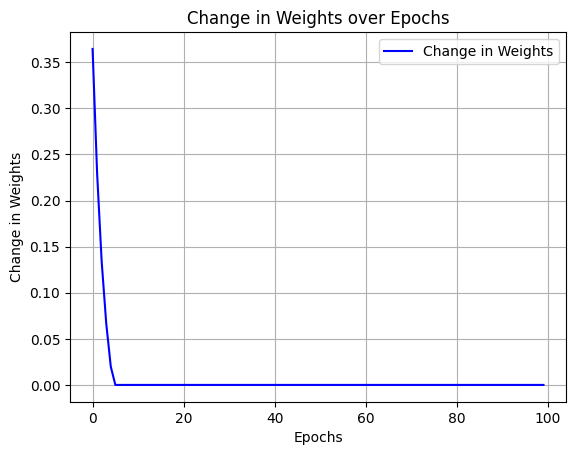

Graph: Change in Weights vs. Epochs


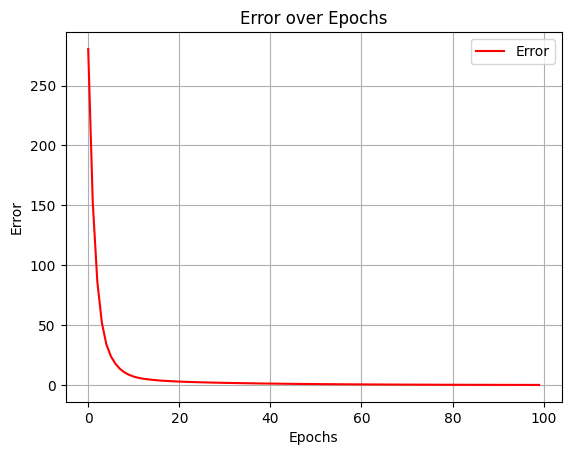

Graph: Error vs. Epochs


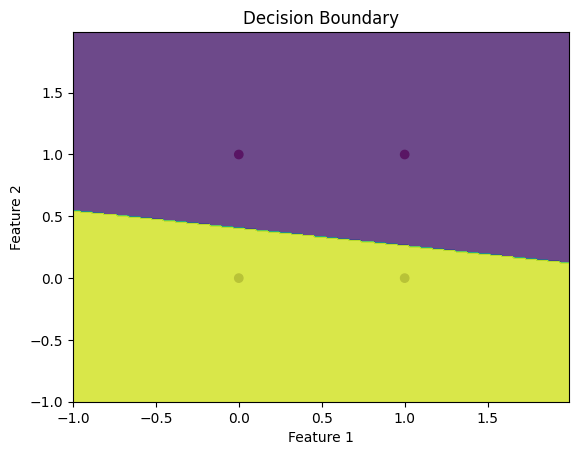

Graph: Decision Boundary


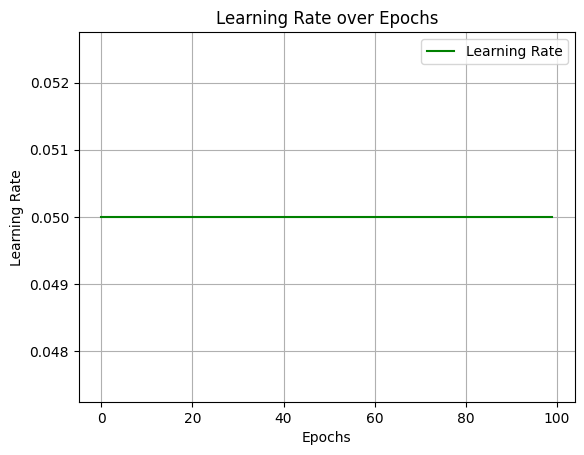

Graph: Learning Rate vs. Epochs


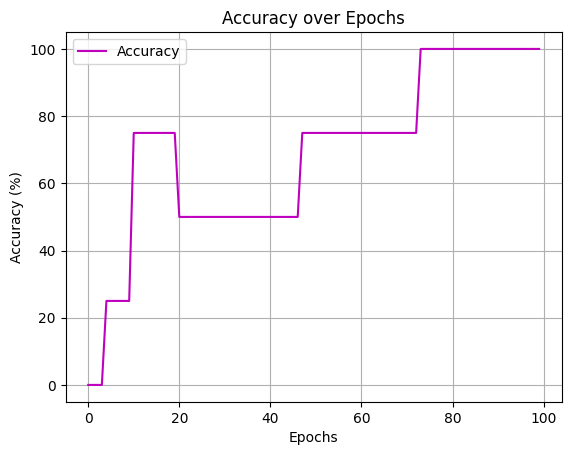

Graph: Accuracy vs. Epochs


In [ ]:
#Repeating A2
#Using the ReLU Function

#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------

"""A2. Repeat the above A1 experiment with following activation functions. Compare the iterations
taken to converge against each of the activation functions. Keep the learning rate same as A1.
• Bi-Polar Step function
• Sigmoid function
• ReLU function"""

#I have put [0,0] as 1 and [1,1] as 0 here (since not mentioned). Trying the other posibility (2/4)
#Repeating A2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define XOR dataset and target outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([1, 0, 1, 0]) # I have put [0,0] as 0 and [1,1] as 1 here.

# Initialize weights and bias
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Define the ReLU activation function
def relu_activation(z):
    return np.maximum(0, z)

# Lists to store changes in weights and epochs
weight_changes = []
epochs_list = []

# Lists to store error and accuracy for plotting
error_list = []
accuracy_list = []

# Training the perceptron for XOR logic
epochs = 100
for epoch in range(epochs):
    error = 0
    correct_predictions = 0
    for i in range(len(X)):
        # Forward pass
        input_layer = X[i]
        z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
        output = relu_activation(z1)  # Apply ReLU activation function

        # Compute the error
        delta = y[i] - output
        error += delta ** 2

        # Update weights
        W0 += learning_rate * delta
        W1 += learning_rate * delta * input_layer[0]
        W2 += learning_rate * delta * input_layer[1]

        # Count correct predictions
        if y[i] == np.round(output):
            correct_predictions += 1

    # Append the weight change and epoch number
    weight_changes.append(abs(learning_rate * delta))
    epochs_list.append(epoch)

    # Calculate accuracy and append to list
    accuracy = correct_predictions / len(X)
    accuracy_list.append(accuracy)

    # Append error for this epoch
    error_list.append(error)

    # Print the error and accuracy for this epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Error = {error}, Accuracy = {accuracy * 100}%")

# Test the perceptron
print("Final weights:")
print(f"W0 = {W0}, W1 = {W1}, W2 = {W2}")

print("Testing the perceptron on XOR logic:")
for i in range(len(X)):
    input_layer = X[i]
    z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
    output = relu_activation(z1)  # Apply ReLU activation function
    print(f"Input: {input_layer}, Predicted Output: {np.round(output)}")

# Plotting the graphs
plot_weight_changes(epochs_list, weight_changes)
plot_error(epochs_list, error_list)
plot_decision_boundary(X, y, W0, W1, W2)
plot_learning_rate(epochs_list, learning_rate)
plot_accuracy(epochs_list, accuracy_list)

Epoch 0: Error = 297.3757828125, Accuracy = 0.0%
Epoch 10: Error = 11.24624541176996, Accuracy = 75.0%
Epoch 20: Error = 5.345602033623052, Accuracy = 50.0%
Epoch 30: Error = 3.444769513209351, Accuracy = 50.0%
Epoch 40: Error = 2.3081010845217222, Accuracy = 50.0%
Epoch 50: Error = 1.553979333077561, Accuracy = 50.0%
Epoch 60: Error = 1.0470549744389692, Accuracy = 50.0%
Epoch 70: Error = 0.7056131861915954, Accuracy = 75.0%
Epoch 80: Error = 0.47553618134660436, Accuracy = 75.0%
Epoch 90: Error = 0.32048392988768726, Accuracy = 100.0%
Final weights:
W0 = 0.39688943337244453, W1 = 0.38115486324682996, W2 = -3.0746774662749665
Testing the perceptron on XOR logic:
Input: [0 0], Predicted Output: 0.0
Input: [0 1], Predicted Output: 0.0
Input: [1 0], Predicted Output: 1.0
Input: [1 1], Predicted Output: 0.0


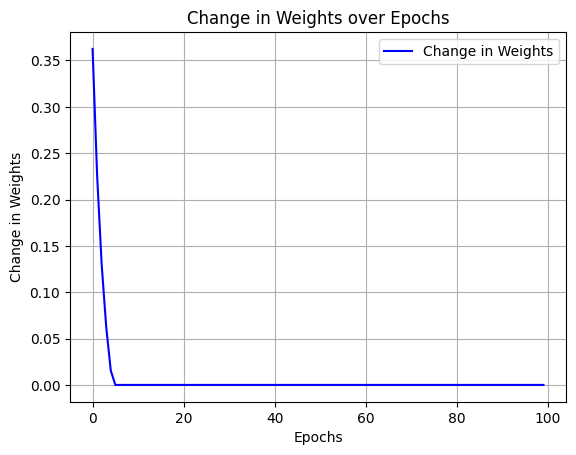

Graph: Change in Weights vs. Epochs


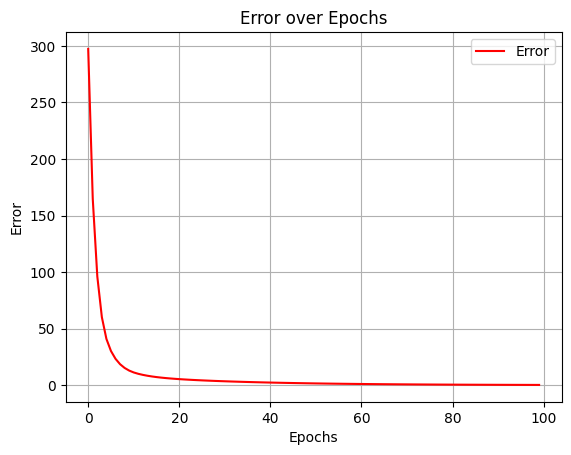

Graph: Error vs. Epochs


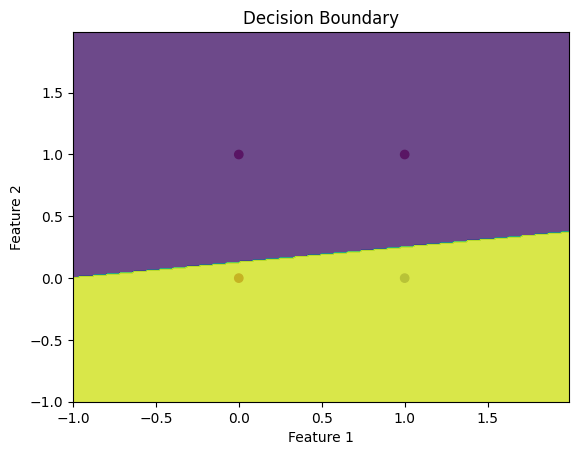

Graph: Decision Boundary


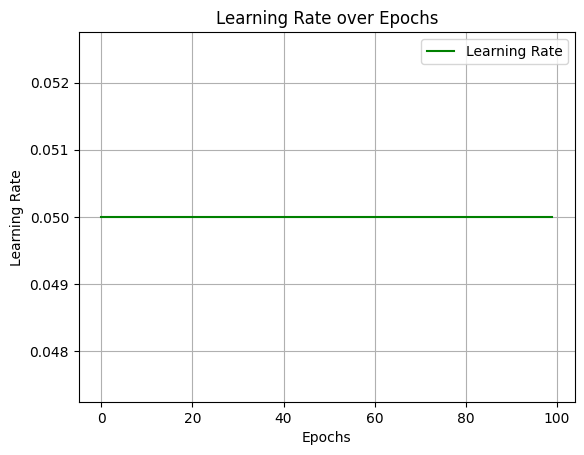

Graph: Learning Rate vs. Epochs


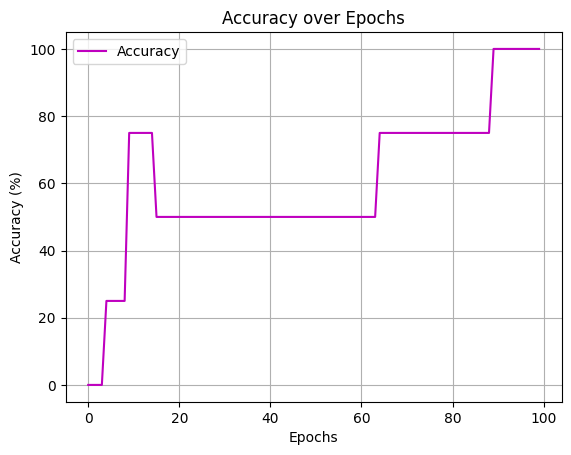

Graph: Accuracy vs. Epochs


In [ ]:
#Repeating A2
#Using the ReLU Function

#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------

"""A2. Repeat the above A1 experiment with following activation functions. Compare the iterations
taken to converge against each of the activation functions. Keep the learning rate same as A1.
• Bi-Polar Step function
• Sigmoid function
• ReLU function"""

#I have put [0,0] as 0 and [1,1] as 0 here (since not mentioned). Trying the other posibility (3/4)
#Repeating A2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define XOR dataset and target outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 1, 0]) # I have put [0,0] as 0 and [1,1] as 1 here.

# Initialize weights and bias
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Define the ReLU activation function
def relu_activation(z):
    return np.maximum(0, z)

# Lists to store changes in weights and epochs
weight_changes = []
epochs_list = []

# Lists to store error and accuracy for plotting
error_list = []
accuracy_list = []

# Training the perceptron for XOR logic
epochs = 100
for epoch in range(epochs):
    error = 0
    correct_predictions = 0
    for i in range(len(X)):
        # Forward pass
        input_layer = X[i]
        z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
        output = relu_activation(z1)  # Apply ReLU activation function

        # Compute the error
        delta = y[i] - output
        error += delta ** 2

        # Update weights
        W0 += learning_rate * delta
        W1 += learning_rate * delta * input_layer[0]
        W2 += learning_rate * delta * input_layer[1]

        # Count correct predictions
        if y[i] == np.round(output):
            correct_predictions += 1

    # Append the weight change and epoch number
    weight_changes.append(abs(learning_rate * delta))
    epochs_list.append(epoch)

    # Calculate accuracy and append to list
    accuracy = correct_predictions / len(X)
    accuracy_list.append(accuracy)

    # Append error for this epoch
    error_list.append(error)

    # Print the error and accuracy for this epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Error = {error}, Accuracy = {accuracy * 100}%")

# Test the perceptron
print("Final weights:")
print(f"W0 = {W0}, W1 = {W1}, W2 = {W2}")

print("Testing the perceptron on XOR logic:")
for i in range(len(X)):
    input_layer = X[i]
    z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
    output = relu_activation(z1)  # Apply ReLU activation function
    print(f"Input: {input_layer}, Predicted Output: {np.round(output)}")

# Plotting the graphs
plot_weight_changes(epochs_list, weight_changes)
plot_error(epochs_list, error_list)
plot_decision_boundary(X, y, W0, W1, W2)
plot_learning_rate(epochs_list, learning_rate)
plot_accuracy(epochs_list, accuracy_list)

Epoch 0: Error = 267.04762100000005, Accuracy = 0.0%
Epoch 10: Error = 9.880156644102625, Accuracy = 0.0%
Epoch 20: Error = 4.177991784331678, Accuracy = 50.0%
Epoch 30: Error = 2.8537450021097324, Accuracy = 50.0%
Epoch 40: Error = 2.198161176674269, Accuracy = 50.0%
Epoch 50: Error = 1.8435831080553011, Accuracy = 50.0%
Epoch 60: Error = 1.1583860468150833, Accuracy = 50.0%
Epoch 70: Error = 0.7331619575227619, Accuracy = 75.0%
Epoch 80: Error = 0.5124307696558008, Accuracy = 75.0%
Epoch 90: Error = 0.39818314949327716, Accuracy = 100.0%
Final weights:
W0 = 0.9458733977168371, W1 = 0.36222727245022757, W2 = -0.6537846734792018
Testing the perceptron on XOR logic:
Input: [0 0], Predicted Output: 1.0
Input: [0 1], Predicted Output: 0.0
Input: [1 0], Predicted Output: 1.0
Input: [1 1], Predicted Output: 1.0


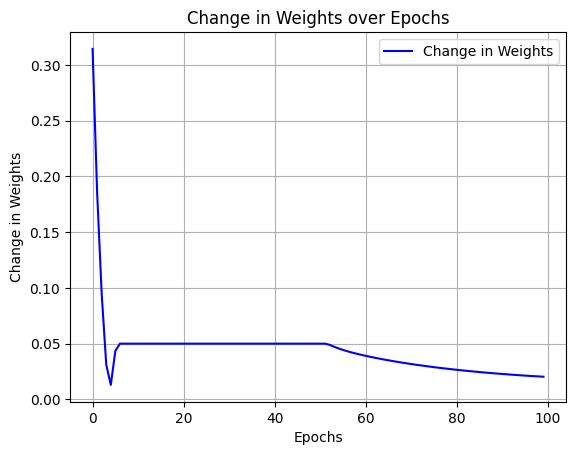

Graph: Change in Weights vs. Epochs


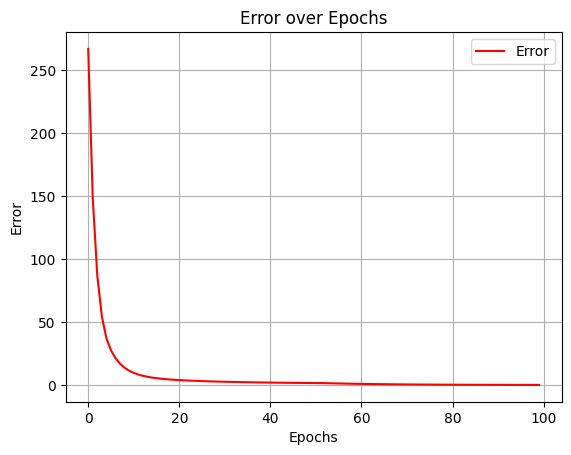

Graph: Error vs. Epochs


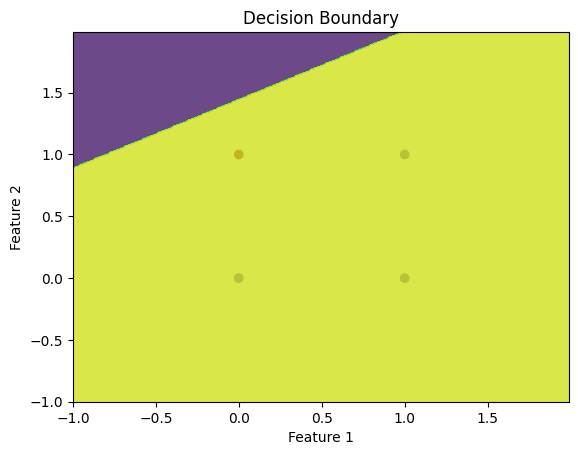

Graph: Decision Boundary


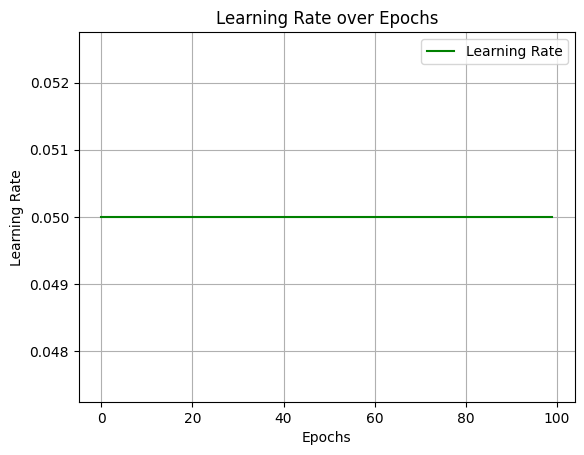

Graph: Learning Rate vs. Epochs


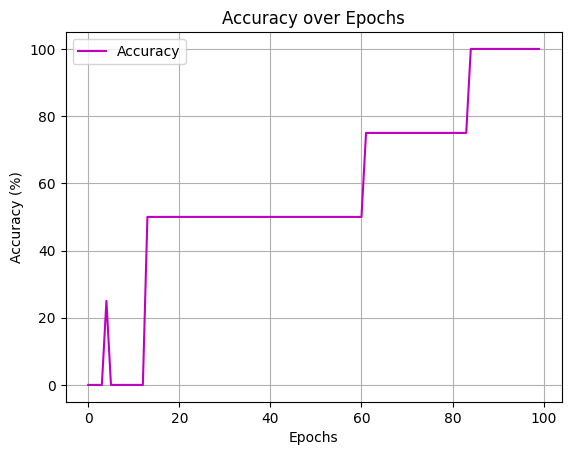

Graph: Accuracy vs. Epochs


In [ ]:
#Repeating A2
#Using the ReLU Function

#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------

"""A2. Repeat the above A1 experiment with following activation functions. Compare the iterations
taken to converge against each of the activation functions. Keep the learning rate same as A1.
• Bi-Polar Step function
• Sigmoid function
• ReLU function"""

#I have put [0,0] as 1 and [1,1] as 1 here (since not mentioned). Trying the other posibility (4/4)
#Repeating A2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define XOR dataset and target outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([1, 0, 1, 1]) # I have put [0,0] as 0 and [1,1] as 1 here.

# Initialize weights and bias
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Define the ReLU activation function
def relu_activation(z):
    return np.maximum(0, z)

# Lists to store changes in weights and epochs
weight_changes = []
epochs_list = []

# Lists to store error and accuracy for plotting
error_list = []
accuracy_list = []

# Training the perceptron for XOR logic
epochs = 100
for epoch in range(epochs):
    error = 0
    correct_predictions = 0
    for i in range(len(X)):
        # Forward pass
        input_layer = X[i]
        z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
        output = relu_activation(z1)  # Apply ReLU activation function

        # Compute the error
        delta = y[i] - output
        error += delta ** 2

        # Update weights
        W0 += learning_rate * delta
        W1 += learning_rate * delta * input_layer[0]
        W2 += learning_rate * delta * input_layer[1]

        # Count correct predictions
        if y[i] == np.round(output):
            correct_predictions += 1

    # Append the weight change and epoch number
    weight_changes.append(abs(learning_rate * delta))
    epochs_list.append(epoch)

    # Calculate accuracy and append to list
    accuracy = correct_predictions / len(X)
    accuracy_list.append(accuracy)

    # Append error for this epoch
    error_list.append(error)

    # Print the error and accuracy for this epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Error = {error}, Accuracy = {accuracy * 100}%")

# Test the perceptron
print("Final weights:")
print(f"W0 = {W0}, W1 = {W1}, W2 = {W2}")

print("Testing the perceptron on XOR logic:")
for i in range(len(X)):
    input_layer = X[i]
    z1 = W0 + np.dot(input_layer, np.array([W1, W2]))
    output = relu_activation(z1)  # Apply ReLU activation function
    print(f"Input: {input_layer}, Predicted Output: {np.round(output)}")

# Plotting the graphs
plot_weight_changes(epochs_list, weight_changes)
plot_error(epochs_list, error_list)
plot_decision_boundary(X, y, W0, W1, W2)
plot_learning_rate(epochs_list, learning_rate)
plot_accuracy(epochs_list, accuracy_list)

Testing the MLPClassifier on XOR logic:
Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 1
Epoch 0: Error = 0.5, Accuracy = 50.0%
Epoch 10: Error = 0.5, Accuracy = 50.0%
Epoch 20: Error = 0.75, Accuracy = 25.0%
Epoch 30: Error = 0.75, Accuracy = 25.0%
Epoch 40: Error = 0.75, Accuracy = 25.0%
Epoch 50: Error = 0.75, Accuracy = 25.0%
Epoch 60: Error = 0.75, Accuracy = 25.0%
Epoch 70: Error = 0.5, Accuracy = 50.0%
Epoch 80: Error = 0.5, Accuracy = 50.0%
Epoch 90: Error = 0.5, Accuracy = 50.0%


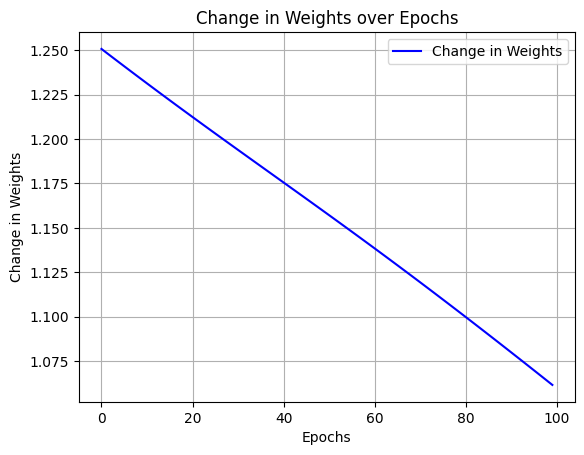

Graph: Change in Weights vs. Epochs


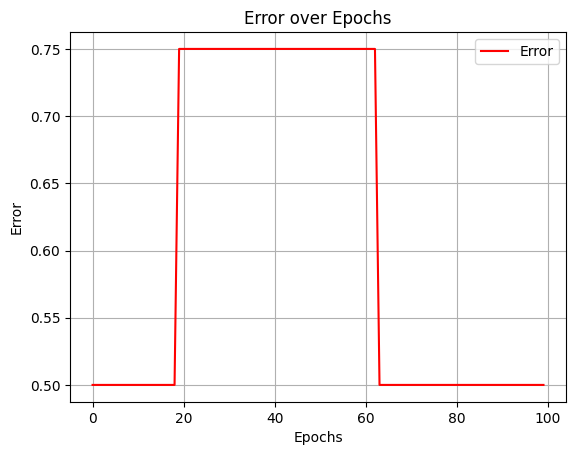

Graph: Error vs. Epochs


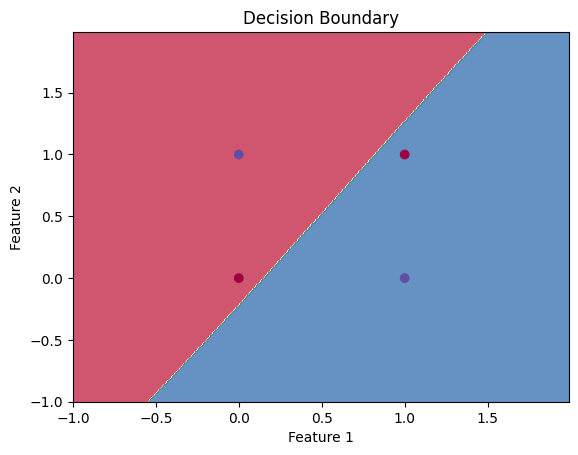

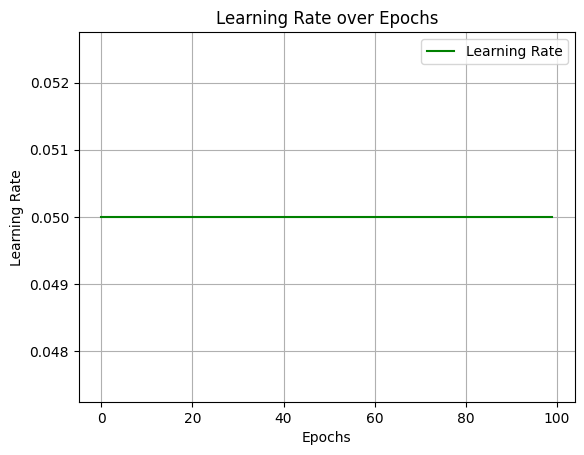

Graph: Learning Rate vs. Epochs


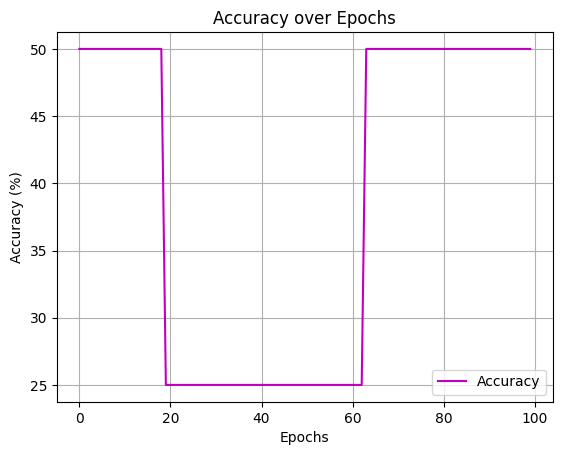

Graph: Accuracy vs. Epochs


In [ ]:
#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------

""" A10. Learn using a MLP network from Sci-Kit manual available at https://scikitlearn.
org/stable/modules/neural_networks_supervised.html. Repeat the AND Gate and XOR Gate
exercises using MLPClassifier() function. """

#For XOR Logic

import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Define XOR dataset and target outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])  # XOR gate truth table

# Create an MLPClassifier model
model_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=10000, random_state=42)

# Train the model
model_xor.fit(X, y_xor)

# Test the model
predictions_xor = model_xor.predict(X)

print("Testing the MLPClassifier on XOR logic:")
for i in range(len(X)):
    input_layer = X[i]
    predicted_output = predictions_xor[i]
    print(f"Input: {input_layer}, Predicted Output: {predicted_output}")

# Training-related variables
epochs_list = []
weight_changes = []
error_list = []
accuracy_list = []

# Training the MLP for XOR logic
epochs = 100
for epoch in range(epochs):
    model_xor.partial_fit(X, y_xor, classes=np.unique(y_xor))

    # Calculate accuracy
    accuracy = np.mean(model_xor.predict(X) == y_xor)

    # Append values to lists
    epochs_list.append(epoch)
    weight_changes.append(np.sum(np.abs(model_xor.coefs_[0])))
    error_list.append(1 - accuracy)
    accuracy_list.append(accuracy)

    # Print the error and accuracy for this epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Error = {1 - accuracy}, Accuracy = {accuracy * 100}%")

# Function to plot the decision boundary
def plot_decision_boundary(X, y, model):
    plot_step = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

# Plot the graphs
plot_weight_changes(epochs_list, weight_changes)
plot_error(epochs_list, error_list)
plot_decision_boundary(X, y_xor, model_xor)
plot_learning_rate(epochs_list, 0.05)
plot_accuracy(epochs_list, accuracy_list)



Epoch 0: Error = 0.75, Accuracy = 25.0%
Epoch 10: Error = 0.75, Accuracy = 25.0%
Epoch 20: Error = 0.75, Accuracy = 25.0%
Epoch 30: Error = 0.75, Accuracy = 25.0%
Epoch 40: Error = 0.5, Accuracy = 50.0%
Epoch 50: Error = 0.5, Accuracy = 50.0%
Epoch 60: Error = 0.25, Accuracy = 75.0%
Epoch 70: Error = 0.25, Accuracy = 75.0%
Epoch 80: Error = 0.5, Accuracy = 50.0%
Epoch 90: Error = 0.5, Accuracy = 50.0%
Testing the MLPClassifier on AND logic:
Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 0
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 0


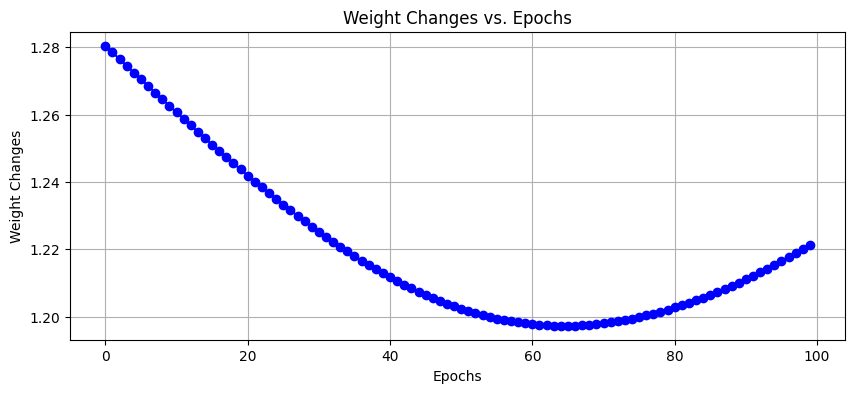

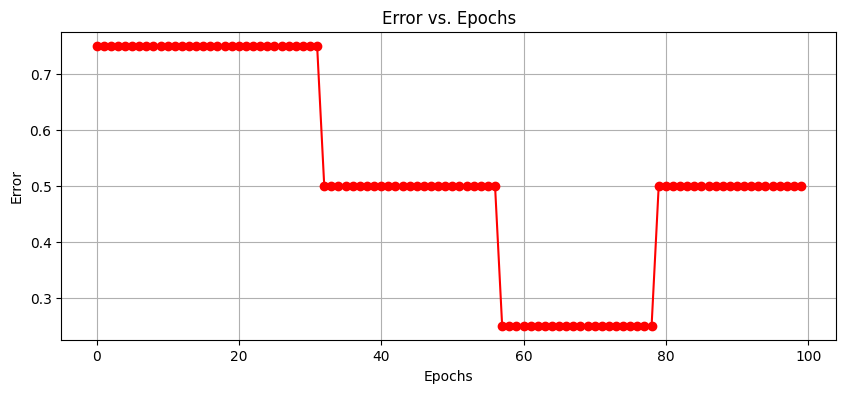

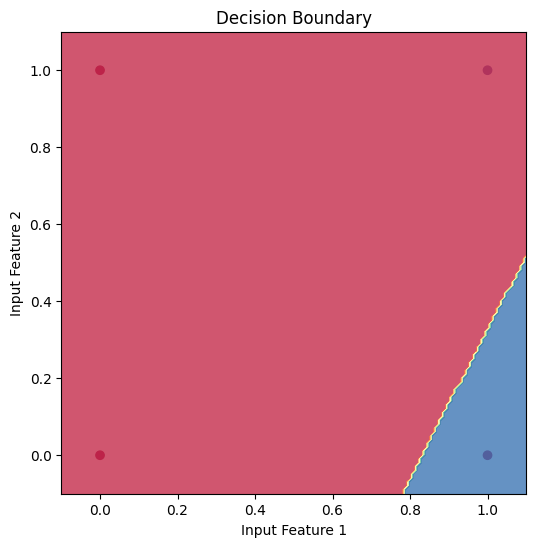

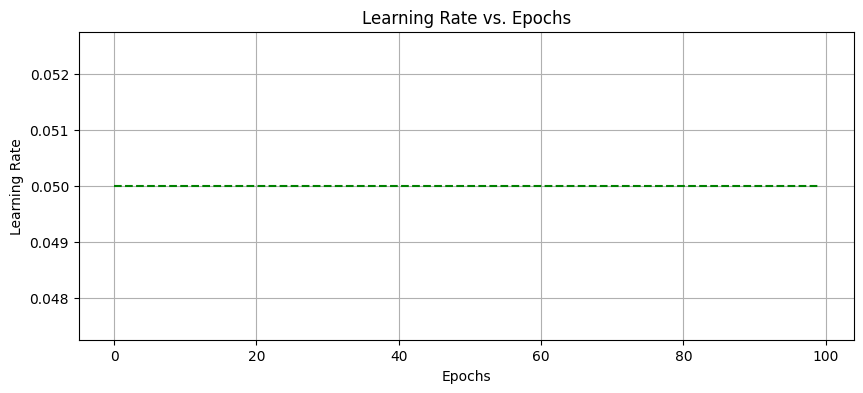

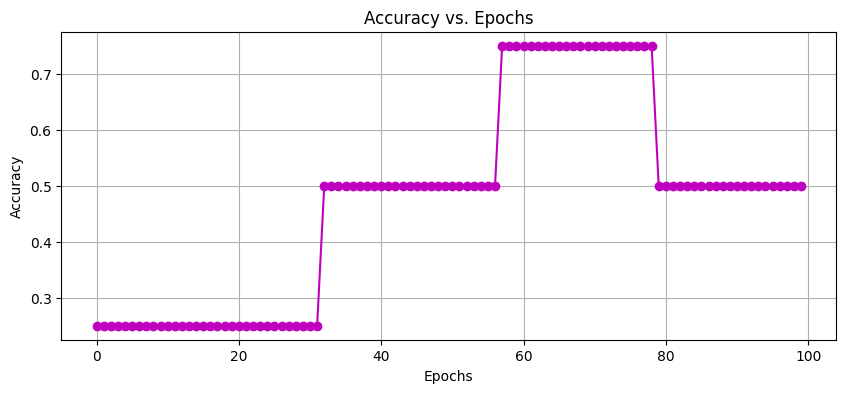

In [ ]:
#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines
#---------------------------------------------

""" A10. Learn using a MLP network from Sci-Kit manual available at https://scikitlearn.
org/stable/modules/neural_networks_supervised.html. Repeat the AND Gate and XOR Gate
exercises using MLPClassifier() function. """

#For AND Logic

import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Define AND dataset and target outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])  # AND gate truth table

# Create an MLPClassifier model
model_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=10000, random_state=42)

# Training-related variables
epochs_list = []
weight_changes = []
error_list = []
accuracy_list = []

# Training the MLP for AND logic
epochs = 100
for epoch in range(epochs):
    model_and.partial_fit(X, y_and, classes=np.unique(y_and))

    # Calculate accuracy
    accuracy = np.mean(model_and.predict(X) == y_and)

    # Append values to lists
    epochs_list.append(epoch)
    weight_changes.append(np.sum(np.abs(model_and.coefs_[0])))
    error_list.append(1 - accuracy)
    accuracy_list.append(accuracy)

    # Print the error and accuracy for this epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Error = {1 - accuracy}, Accuracy = {accuracy * 100}%")

# Test the model
predictions_and = model_and.predict(X)

print("Testing the MLPClassifier on AND logic:")
for i in range(len(X)):
    input_layer = X[i]
    predicted_output = predictions_and[i]
    print(f"Input: {input_layer}, Predicted Output: {predicted_output}")

# Plot the graphs
plot_weight_changes(epochs_list, weight_changes)
plot_error(epochs_list, error_list)
plot_decision_boundary(X, y_and, model_and)
plot_learning_rate(epochs_list, 0.05)
plot_accuracy(epochs_list, accuracy_list)




 The required dataset that is made from merging the original dataset, and the embedded dataset, on the basis of Judgment Status attribute is:

      embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0    0.009625 -0.029216  0.027109  0.023631 -0.004972  0.031757 -0.045125   
1   -0.007535 -0.039844  0.030167  0.031224  0.004742  0.028289 -0.068723   
2    0.022408 -0.030840  0.032328  0.046965  0.007798  0.025860 -0.065093   
3    0.019677 -0.034055  0.012662  0.070387 -0.011170  0.017842 -0.050945   
4    0.017678 -0.030323  0.012829  0.065267 -0.025161  0.011964 -0.050590   
..        ...       ...       ...       ...       ...       ...       ...   
895  0.019743 -0.071799  0.022546  0.049042 -0.005767 -0.016275 -0.037731   
896  0.000186 -0.027604  0.010623  0.038237 -0.026675  0.020215 -0.040816   
897  0.018066 -0.032152  0.039794  0.047608  0.003898  0.024092 -0.056508   
898 -0.003492 -0.022739  0.021777  0.044054 -0.005621  0.013863 -0.079196   
899  0.01

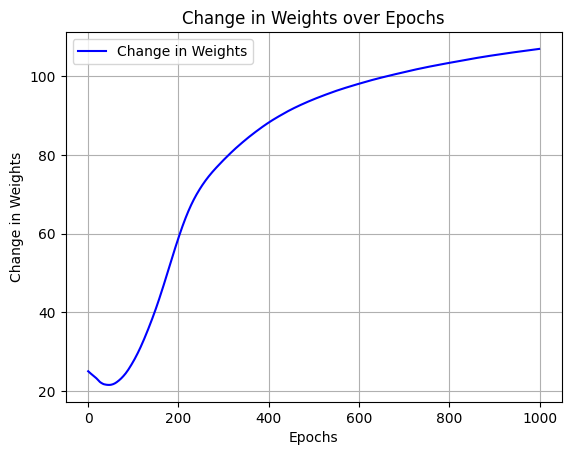

Graph: Change in Weights vs. Epochs


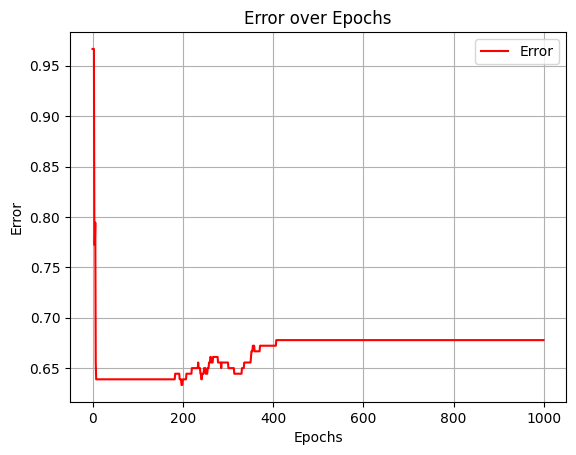

Graph: Error vs. Epochs


C:\Users\Sunil George\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


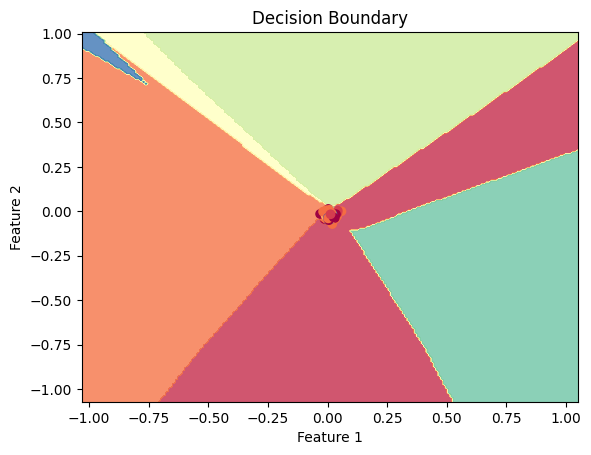

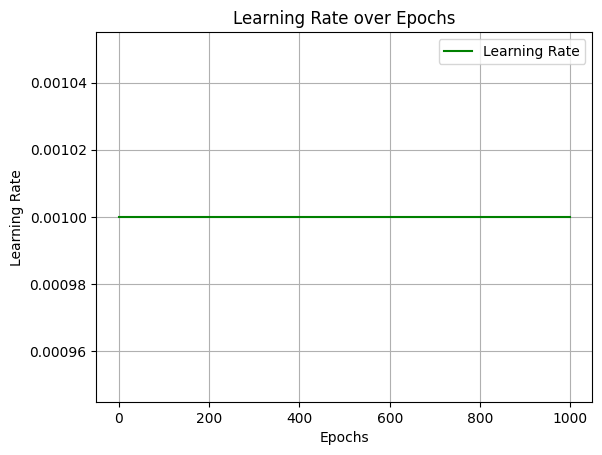

Graph: Learning Rate vs. Epochs


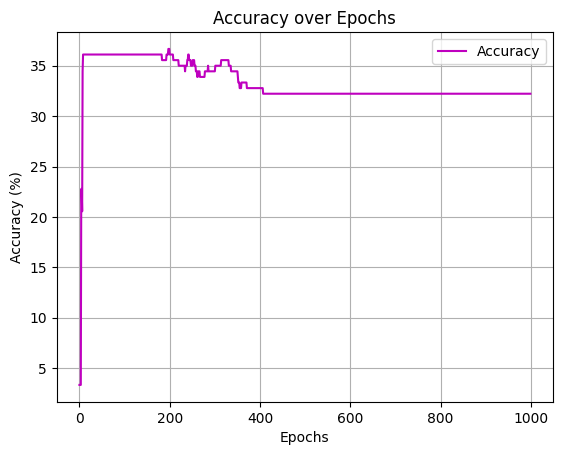

Graph: Accuracy vs. Epochs


In [ ]:
""" A11. Use the MLPClassifier() function on your project dataset. """

""" Observation 1b:
Here, we can notice that the accuracy of the same question that Ashik has done, has reduced to approximately half of it, that is 32% (excluding decimals).
Here, we have used CP1252 encoding + Absence of Simple Imputer.
This is not a good combination for doing this question. We therefore understand the importance of the kind of encoding to be used, as well as the presence
of Simple Imputer. This is because the kind of encoding used can influence your accuracy, and the presence of Simple Imputer can enhance the accuracy too."""

#----------------------------------------

#BL.EN.U4CSE21017
#Angelina George
#Contribution: Code + Comment Lines + Observation of the Results (Accuracy)
#---------------------------------------------
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define your mergedatasets function
def mergedatasets(e, l):
    df = pd.concat([e, l], axis=1)  # Combining both datasets
    print("\n The required dataset that is made from merging the original dataset, and the embedded dataset, on the basis of Judgment Status attribute is:\n")
    print(df)
    return df

# Read the original and embedded datasets
e = pd.read_csv('embeddingsdata.csv')  # Embedded Dataset
l = pd.read_csv('Modified_Dataset to B.tech.csv', encoding='cp1252')  # Original Dataset

# Merge the datasets using your function
mdf = mergedatasets(e, l)
print("The merged dataset is as follows:\n")
print(mdf)

# Handle missing values by imputing with column means after type conversion
numeric_columns = mdf.select_dtypes(include=['number']).columns  # Select numeric columns

# Convert to numeric, coerce errors to NaN
mdf[numeric_columns] = mdf[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate column-wise means only for numeric columns
column_means = mdf[numeric_columns].mean()

# Fill missing values with column means
mdf[numeric_columns] = mdf[numeric_columns].fillna(column_means)

print("\nThe first few observations of the newly merged dataset after handling missing values:\n")
print(mdf.head())

# Define columns to drop
columns_to_drop = ["Id", "Judgment", "Lawyers Summary", "Domain", "Judgment Status",
                   "Equivalent Citation", "Name", "Court name", "Label_Judgment Status"]

# Drop the specified columns from the DataFrame
mdf.drop(columns=columns_to_drop, inplace=True)

# Split the dataset into features (X) and target variable (y)
X = mdf[['embed_0', 'embed_1']]  # Replace with your actual feature names # There are up to embed_767, so just choosing two for now
y = mdf['Label_Domain']

# Checking if it identifies it to be continuous or discrete in nature
print("\n The datatype of y before type conversion is...:\n")
print(y.dtype)

# As it comes to be float (continuous in nature), we are converting it to be an integer...
y = y.astype(int)
print("\n The datatype of y after type conversion is...:\n")
print(y.dtype)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an MLPClassifier model
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=1000, random_state=42)

# Training-related variables
epochs_list = []
weight_changes = []
error_list = []
accuracy_list = []

# Training the MLP model
epochs = 1000
for epoch in range(epochs):
    model.partial_fit(X_train, y_train, classes=np.unique(y_train))

    # Calculate accuracy
    accuracy = accuracy_score(y_test, model.predict(X_test))

    # Append values to lists
    epochs_list.append(epoch)
    weight_changes.append(np.sum(np.abs(model.coefs_[0])))
    error_list.append(1 - accuracy)
    accuracy_list.append(accuracy)

    # Print the error and accuracy for this epoch
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Error = {1 - accuracy}, Accuracy = {accuracy * 100:.2f}%")

# Plot the graphs
plot_weight_changes(epochs_list, weight_changes)
plot_error(epochs_list, error_list)
plot_decision_boundary(X_test.values, y_test, model)
plot_learning_rate(epochs_list, 0.001)  # You can adjust the learning rate here
plot_accuracy(epochs_list, accuracy_list)

